In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Introduction
#### This Project will be showed us New Zealand economy how related economic each indicators. 


* [1. Import Libraries](#Import-Libraries) 
    

* [2. Import Data](#Import-Data)
    * [Web APIs](#Web-API)                  
    * [Data Integration](#Data-Integration)

* [3. Data Analysis](#Data-Analysis)
	
* [4. Predict Models](#Predictive-Models)
	 * [ Linear Regression Model](#Linear-Regression-Model )
     * [Multiple Regression Model]( #Multiple-Regression-Model)
     * [Polynomial Regression Model]( #Polynomial-Regression-Model)
     * [K-Nearest Neighbors Model](#K-Nearest-Neighbors-Model)        
* [5. Result](#Result)

#### Import Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from sklearn import neighbors
from bs4 import BeautifulSoup
import requests
import json
import collections
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff


from plotly import __version__
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

cf.go_offline()
print __version__  # requires version >= 1.9.0

1.12.9


In [0]:
import plotly.graph_objs as go
import plotly.tools as tls

In [0]:
from pylab import rcParams

sns.set(style="ticks")
sns.set_style("whitegrid")
rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['font.size'] = 20

In [0]:
rcParams['figure.figsize'] = 13, 8
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )

In [0]:
from IPython.core.display import HTML
HTML("<iframe src=https://en.wikipedia.org/wiki/Economy_of_New_Zealand width=1100 height=500></iframe>")

###### According to news, New Zealand gross domestic product grew 0.9 percent in last quarter of 2016 the annual growth to 3.6 percent. The result shows this growth the biggest quarter last 20 years. 


#### Can we make a predictable model? How economic indicatord affect GDP and Foreign exchange rates?



## Import Data
#### Web API

In [0]:
url = 'https://www.quandl.com/api/v3/datasets/RBNZ/M5.json?api_key=???'

In [0]:
response = requests.get(url)
data = json.loads(response.content)



In [0]:
df1= pd.DataFrame(data['dataset']['data'])
df1.head()

0        1        2    3    4        5        6    7    8   \
0  2016-03-31  56408.0  56970.0  0.7  2.8  63752.0  63139.0  2.0  4.4   
1  2015-12-31  58913.0  56548.0  0.9  2.3  64935.0  61907.0 -0.1  3.3   
2  2015-09-30  55391.0  56047.0  0.8  2.3  59215.0  61991.0  0.7  4.1   
3  2015-06-30  54467.0  55589.0  0.3  2.4  60744.0  61583.0  1.8  3.5   
4  2015-03-31  54857.0  55407.0  0.2  3.0  61072.0  60505.0  0.9  2.1   

        9  ...    63   64       65       66   67   68       69       70   71  \
0  56922.0 ...  -1.0  1.2  15489.0  16671.0 -2.8  0.6  17144.0  18284.0  0.2   
1  58816.0 ...   0.0  3.5  18080.0  17150.0 -2.1  2.2  19023.0  18244.0  0.8   
2  53312.0 ...   1.9  9.2  18597.0  17516.0  3.9  8.1  19119.0  18097.0 -2.6   
3  54397.0 ...   0.2  7.4  16091.0  16865.0  2.0  3.9  17879.0  18575.0  1.5   
4  55189.0 ...   1.3  6.4  15395.0  16538.0 -1.5  2.9  17174.0  18297.0  0.7   

    72  
0 -0.2  
1  0.4  
2  2.0  
3  5.8  
4  6.7  

[5 rows x 73 columns]

In [0]:
 gdp = df1.iloc[:,[0,1,25,61,69]]

In [0]:
gdp.columns = ['Date','GDP','Government_expenditure','Export_of_goods','Import_of_goods']

gdp.head()

Date      GDP  Government_expenditure  Export_of_goods  \
0  2016-03-31  56408.0                 10354.0          17972.0   
1  2015-12-31  58913.0                 10411.0          17047.0   
2  2015-09-30  55391.0                 10391.0          14764.0   
3  2015-06-30  54467.0                 10943.0          16438.0   
4  2015-03-31  54857.0                 10227.0          17754.0   

   Import_of_goods  
0          17144.0  
1          19023.0  
2          19119.0  
3          17879.0  
4          17174.0

 * GDP ->   PRODUCTION-BASED GROSS DOMESTIC PRODUCT - REAL M(NZD)
 * Goverment_expenditure -> GENERAL GOVERNMENT FINAL CONSUMPTION EXPENDITURE - REAL M(NZD)
 * Export_of_goods -> EXPORTS OF GOODS AND SERVICES - REAL M(NZD)
 * Import_of_goods -> IMPORT OF GOODS AND SERVICES - REAL M(NZD)

In [0]:
gdp['Date'] = pd.to_datetime(gdp['Date'])
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 5 columns):
Date                      116 non-null datetime64[ns]
GDP                       116 non-null float64
Government_expenditure    116 non-null float64
Export_of_goods           116 non-null float64
Import_of_goods           116 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.6 KB


In [0]:
x_x = gdp['Date']
y_y = gdp['GDP']

trace = go.Scatter(
    x = x_x,
    y = y_y,
    mode='markers+lines',
    line=dict(color='rgba(176,196,222)'),
)
data = [trace]
py.iplot(data, filename = 'basic line')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~erdem_alpkaya/0 or inside your plot.ly account where it is named 'basic line'


In [0]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://i64.tinypic.com/30k7eky.png")

In [0]:
from IPython.core.display import HTML
HTML("<iframe src=https://en.wikipedia.org/wiki/Gross_domestic_product#/media/File:GDP_per_capita_(nominal)_2015.png width=1100 height=500></iframe>")

In [0]:
url2 = 'https://www.quandl.com/api/v3/datasets/OECD/MEI_FIN_IR3TIB_NZL_Q.json?api_key=???&start_date=1987-03-31&end_date=2016-03-31'

In [0]:
response = requests.get(url2)
data = json.loads(response.content)

In [0]:
interest= pd.DataFrame(data['dataset']['data'])
interest.columns = ['Date','Interest_rate',]
interest.head()

Date  Interest_rate
0  2016-03-31       2.593333
1  2015-12-31       2.846667
2  2015-09-30       2.976667
3  2015-06-30       3.496667
4  2015-03-31       3.643333

In [0]:
interest['Date'] = pd.to_datetime(interest['Date'])
interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
Date             117 non-null datetime64[ns]
Interest_rate    117 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


In [0]:
x_x = interest['Date']
y_y = interest['Interest_rate']

trace = go.Scatter(
    x = x_x,
    y = y_y,
    mode='markers+lines',
    line=dict(color='rgba(176,196,222)'),
)
data = [trace]
layout = dict(title = 'Short—Term Interest Rates, Per Cent Per Annum',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Short Term Interest'),
              )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'basic line')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~erdem_alpkaya/0 or inside your plot.ly account where it is named 'basic line'


In [0]:
Image(url= "http://i64.tinypic.com/2afxt0h.png")

In [0]:
url3 ='https://www.quandl.com/api/v3/datasets/ODA/NZL_GGR.json?api_key=???&start_date=1986-12-31&end_date=2016-12-31'

In [0]:
response = requests.get(url3)
data = json.loads(response.content)
revenue= pd.DataFrame(data['dataset']['data'])

In [0]:
revenue.columns = ['Date','Government_revenue',]
revenue.head(7)

Date  Government_revenue
0  2016-12-31              88.330
1  2015-12-31              84.906
2  2014-12-31              81.148
3  2013-12-31              77.095
4  2012-12-31              73.456
5  2011-12-31              71.600
6  2010-12-31              68.412

In [0]:
revenue['Date'] = pd.to_datetime(revenue['Date'])
revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
Date                  31 non-null datetime64[ns]
Government_revenue    31 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 568.0 bytes


In [0]:
x_x = revenue['Date']
y_y = revenue['Government_revenue']

trace = go.Scatter(
    x = x_x,
    y = y_y,
    mode='markers+lines',
    line=dict(color='rgba(176,196,222)'),
)
data = [trace]
layout = dict(title = 'New Zealand General Government Revenue -  USD Billions',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Government Revenue'),
              )

fig = dict(data=data, layout=layout)

py.iplot(fig, filename = 'basic line')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~erdem_alpkaya/0 or inside your plot.ly account where it is named 'basic line'


In [0]:
Image(url= "http://i67.tinypic.com/1restt.png")

In [0]:
url4 ='https://www.quandl.com/api/v3/datasets/RBNZ/C1_M1.json?api_key=???K&collapse=quarterly&start_date=1987-01-31'

In [0]:
response = requests.get(url4)
data = json.loads(response.content)

In [0]:
money= pd.DataFrame(data['dataset']['data'])
money = money.iloc[:,0:2]
money.columns = ['Date','Money_supply',]
money.head()

Date  Money_supply
0  2015-12-31       46111.0
1  2015-09-30       43498.0
2  2015-06-30       41888.0
3  2015-03-31       42396.0
4  2014-12-31       42359.0

In [0]:
money['Date'] = pd.to_datetime(money['Date'])
money.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
Date            116 non-null datetime64[ns]
Money_supply    116 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


In [0]:
x_x = money['Date']
y_y = money['Money_supply']

trace = go.Scatter(
    x = x_x,
    y = y_y,
    mode='markers+lines',
    line=dict(color='rgba(176,196,222)'),
)

data = [trace]
layout = dict(title = 'C1 M1 Money Supply -  USD Billions',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Money Supply'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'basic line')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~erdem_alpkaya/0 or inside your plot.ly account where it is named 'basic line'


In [0]:
Image(url= "http://i63.tinypic.com/2r4smiq.png")

In [0]:
url5 ='https://www.quandl.com/api/v3/datasets/FRED/DEXUSNZ.json?api_key=???&collapse=quarterly&start_date=1987-01-07&end_date=2016-03-31'

In [0]:
response = requests.get(url5)
data = json.loads(response.content)

In [0]:
exchange = pd.DataFrame(data['dataset']['data'])
exchange.columns = ['Date','Foreign_exchange']
exchange.head()

Date  Foreign_exchange
0  2016-03-31            0.6926
1  2015-12-31            0.6842
2  2015-09-30            0.6390
3  2015-06-30            0.6778
4  2015-03-31            0.7485

In [0]:
exchange['Date'] = pd.to_datetime(exchange['Date'])
exchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
Date                117 non-null datetime64[ns]
Foreign_exchange    117 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


In [0]:
x_x = exchange['Date']
y_y = exchange['Foreign_exchange']

trace = go.Scatter(
    x = x_x,
    y = y_y,
    mode='markers+lines',
    line=dict(color='rgba(176,196,222)'),
)
data = [trace]

layout = dict(title = 'U.S. / New Zealand Foreign Exchange Rate',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Exchange Rate'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'basic line')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~erdem_alpkaya/0 or inside your plot.ly account where it is named 'basic line'


In [0]:
Image(url= "http://i68.tinypic.com/207xfs8.png")

In [0]:
url6 ='https://www.quandl.com/api/v3/datasets/FRED/NZLCPIALLQINMEI.json?api_key=???&collapse=quarterly&start_date=1987-01-01'

In [0]:
response = requests.get(url6)
data = json.loads(response.content)

In [0]:
price = pd.DataFrame(data['dataset']['data'])

price.columns = ['Date','Consumer_price']
price.head()

Date  Consumer_price
0  2015-03-31      107.380738
1  2014-12-31      107.740774
2  2014-09-30      107.920792
3  2014-06-30      107.560756
4  2014-03-31      107.290729

In [0]:
price['Date'] = pd.to_datetime(price['Date'])
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
Date              113 non-null datetime64[ns]
Consumer_price    113 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [0]:
x_x = price['Date']
y_y = price['Consumer_price']

trace = go.Scatter(
    x = x_x,
    y = y_y,
    mode='markers+lines',
    line=dict(color='rgba(176,196,222)'),
)
data = [trace]

layout = dict(title = 'Consumer Price Index: All Items for New Zealand',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Consumer Price'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'basic line')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~erdem_alpkaya/0 or inside your plot.ly account where it is named 'basic line'


In [0]:
Image(url= "http://i65.tinypic.com/zui5pw.png")

## Data Integration

In [0]:
dfs = [gdp,interest,revenue,money,exchange,price]

In [0]:
economy = reduce(lambda left,right: pd.merge(left,right,how='left',on='Date'), dfs)

In [0]:
economy[['GDP','Government_revenue','Money_supply','Consumer_price']] = economy[['GDP','Government_revenue','Money_supply','Consumer_price']].ffill()
economy.dropna(inplace=True)

In [0]:
economy[10:25]

Date      GDP  Government_expenditure  Export_of_goods  \
14 2012-09-30  50715.0                  9657.0          13748.0   
15 2012-06-30  50156.0                 10289.0          15043.0   
16 2012-03-31  50438.0                  9633.0          15386.0   
17 2011-12-31  52693.0                  9882.0          15205.0   
18 2011-09-30  49744.0                  9686.0          13158.0   
19 2011-06-30  48911.0                 10372.0          14972.0   
20 2011-03-31  48919.0                  9669.0          15197.0   
21 2010-12-31  50993.0                  9751.0          14434.0   
22 2010-09-30  48632.0                  9466.0          13006.0   
23 2010-06-30  48370.0                 10003.0          14770.0   
24 2010-03-31  48341.0                  9369.0          14855.0   
25 2009-12-31  50860.0                  9480.0          14057.0   
26 2009-09-30  47807.0                  9361.0          12691.0   
27 2009-06-30  47244.0                  9953.0          14228.0   
28 2009-03-31  47613.0                  9484.0          14263.0   

    Import_of_goods  Interest_rate  Government_revenue  Money_supply  \
14          16225.0       2.650000              73.456       33549.0   
15          14572.0       2.646667              73.456       33505.0   
16          14628.0       2.743333              73.456       33521.0   
17          15866.0       2.713333              71.600       34044.0   
18          16009.0       2.830000              71.600       31886.0   
19          14478.0       2.653333              71.600       31225.0   
20          13625.0       3.003333              71.600       32119.0   
21          15799.0       3.173333              68.412       31521.0   
22          14599.0       3.220000              68.412       29226.0   
23          13196.0       2.883333              68.412       28379.0   
24          12506.0       2.726667              68.412       29453.0   
25          13794.0       2.790000              66.812       29843.0   
26          12991.0       2.773333              66.812       27904.0   
27          12029.0       2.906667              66.812       28033.0   
28          11766.0       3.673333              66.812       29278.0   

    Foreign_exchange  Consumer_price  
14            0.8293      105.400540  
15            0.8027      105.130513  
16            0.8200      104.770477  
17            0.7805      104.230423  
18            0.7675      104.590459  
19            0.8284      104.140414  
20            0.7639      103.150315  
21            0.7687      102.340234  
22            0.7329      100.000000  
23            0.6901       98.919892  
24            0.7098       98.739874  
25            0.7255       98.379838  
26            0.7233       98.559856  
27            0.6447       97.299730  
28            0.5692       96.759676

In [0]:
economy.to_csv('csveconomy.csv', index=False)

## Data Analysis

In [0]:
sns.pairplot(economy)

In [0]:
economy.describe()

GDP  Government_expenditure  Export_of_goods  Import_of_goods  \
count    112.000000              112.000000       112.000000       112.000000   
mean   39898.071429             7557.098214     10776.517857     10153.446429   
std     9026.414955             1633.720801      3328.864890      4087.307741   
min    27493.000000             5312.000000      5097.000000      4300.000000   
25%    30966.250000             6122.750000      7949.500000      6403.500000   
50%    39117.500000             6993.500000     11218.500000      9376.000000   
75%    48348.250000             9324.250000     13547.750000     13761.750000   
max    57579.000000            10696.000000     17754.000000     18948.000000   

       Interest_rate  Government_revenue  Money_supply  Foreign_exchange  \
count     112.000000          112.000000    112.000000        112.000000   
mean        7.307262           49.803866  19028.678571          0.636881   
std         3.953047           17.278068  10516.992814          0.112994   
min         2.643333           24.009000   4998.000000          0.403300   
25%         4.778333           35.969000   9145.250000          0.553450   
50%         6.721666           43.865000  17065.500000          0.640000   
75%         8.757500           67.175000  27472.500000          0.713400   
max        22.693330           84.906000  42396.000000          0.875500   

       Consumer_price  
count      112.000000  
mean        81.455993  
std         15.290345  
min         53.924050  
25%         68.466130  
50%         78.589390  
75%         94.351935  
max        107.920792

In [0]:
economy.set_index(['Date'], inplace=True)

In [0]:
eccorr = economy.corr()

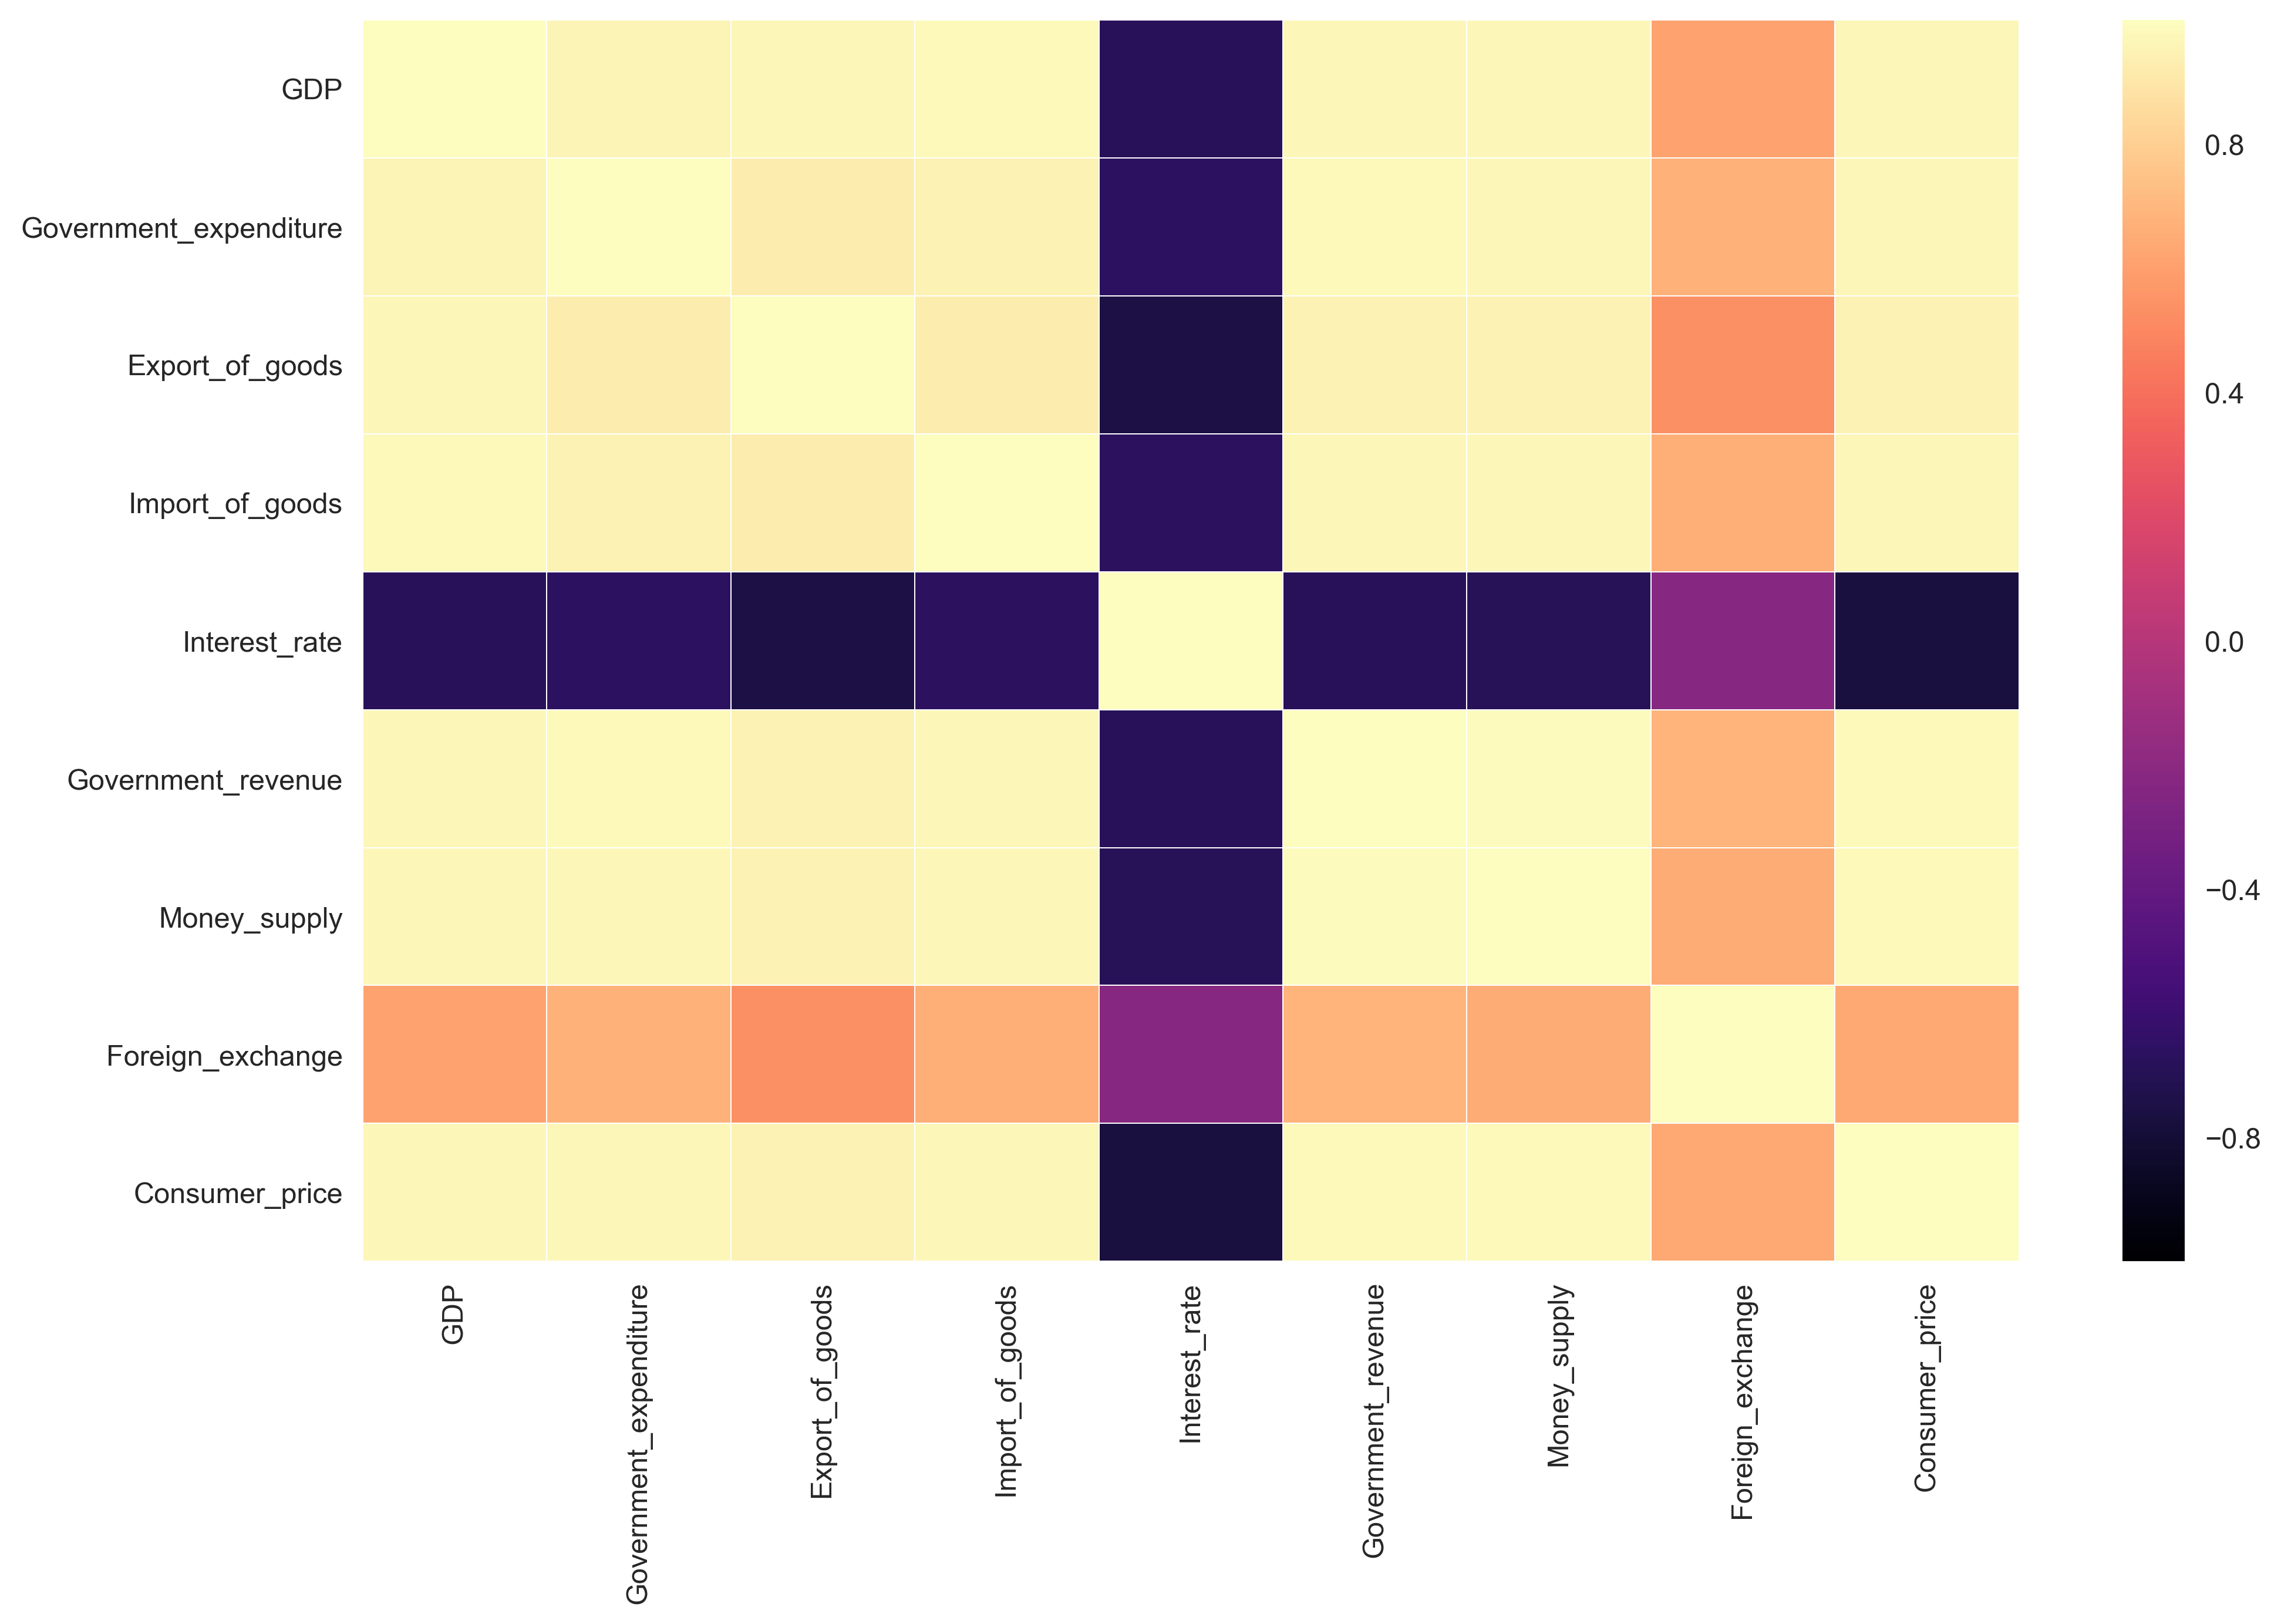

In [0]:
sns.heatmap(eccorr, cmap='magma', linewidths=0.2)

# Predictive Models

## Linear Regression Model

### Model 1

In [0]:
import scipy

def linregress_CIs(xd,yd,conf=0.95):
    """Linear regression CIs FTW!"""
    alpha=1.-conf   # significance
    n = xd.size   # data sample size
    x = np.linspace(xd.min(),xd.max(),1000)
        
    # Predicted values from fitted model:
    a, b, r, p, err = scipy.stats.linregress(xd,yd)
    print a
    print b
    print r
    print p
    print err
    y = a*x+b
    
    sd = 1./(n-2.)*np.sum((yd-a*xd-b)**2)
    print 'np.sum((yd-a*xd-b)**2):', np.sum((yd-a*xd-b)**2)
    print 'sd:', sd
    sd = np.sqrt(sd)
    print 'sqrt sd - RMSE:', sd
    sxd = np.sum((xd-xd.mean())**2) #SS total
    print 'sxd',sxd
    sx  = (x-xd.mean())**2 # variance of each x
    #print sx
    
    # quantile of student's t distribution for p=1-alpha/2
    q = scipy.stats.t.ppf(1.-alpha/2, n-2)
    print q
    # get the upper and lower CI:
    print 'sx/sxd:', sx/sxd
    dy = q*sd*np.sqrt( 1./n + sx/sxd )
    print 'dy:', dy
    yl = y-dy
    yu = y+dy
    
    return yl,yu,x

7.66295021934e-06
0.331144314795
0.612146481796
7.4323244469e-13
9.43800974521e-07
np.sum((yd-a*xd-b)**2): 0.88614970273
sd: 0.00805590638846
sqrt sd - RMSE: 0.0897547012053
sxd 9043854529.43
1.98176528209
sx/sxd: [  1.70155100e-02   1.69329923e-02   1.68506752e-02   1.67685586e-02
   1.66866426e-02   1.66049272e-02   1.65234123e-02   1.64420981e-02
   1.63609844e-02   1.62800713e-02   1.61993587e-02   1.61188468e-02
   1.60385354e-02   1.59584245e-02   1.58785143e-02   1.57988046e-02
   1.57192955e-02   1.56399870e-02   1.55608790e-02   1.54819716e-02
   1.54032648e-02   1.53247586e-02   1.52464529e-02   1.51683479e-02
   1.50904434e-02   1.50127394e-02   1.49352361e-02   1.48579333e-02
   1.47808310e-02   1.47039294e-02   1.46272283e-02   1.45507278e-02
   1.44744279e-02   1.43983286e-02   1.43224298e-02   1.42467316e-02
   1.41712340e-02   1.40959369e-02   1.40208405e-02   1.39459446e-02
   1.38712492e-02   1.37967545e-02   1.37224603e-02   1.36483667e-02
   1.35744736e-02   1.35007

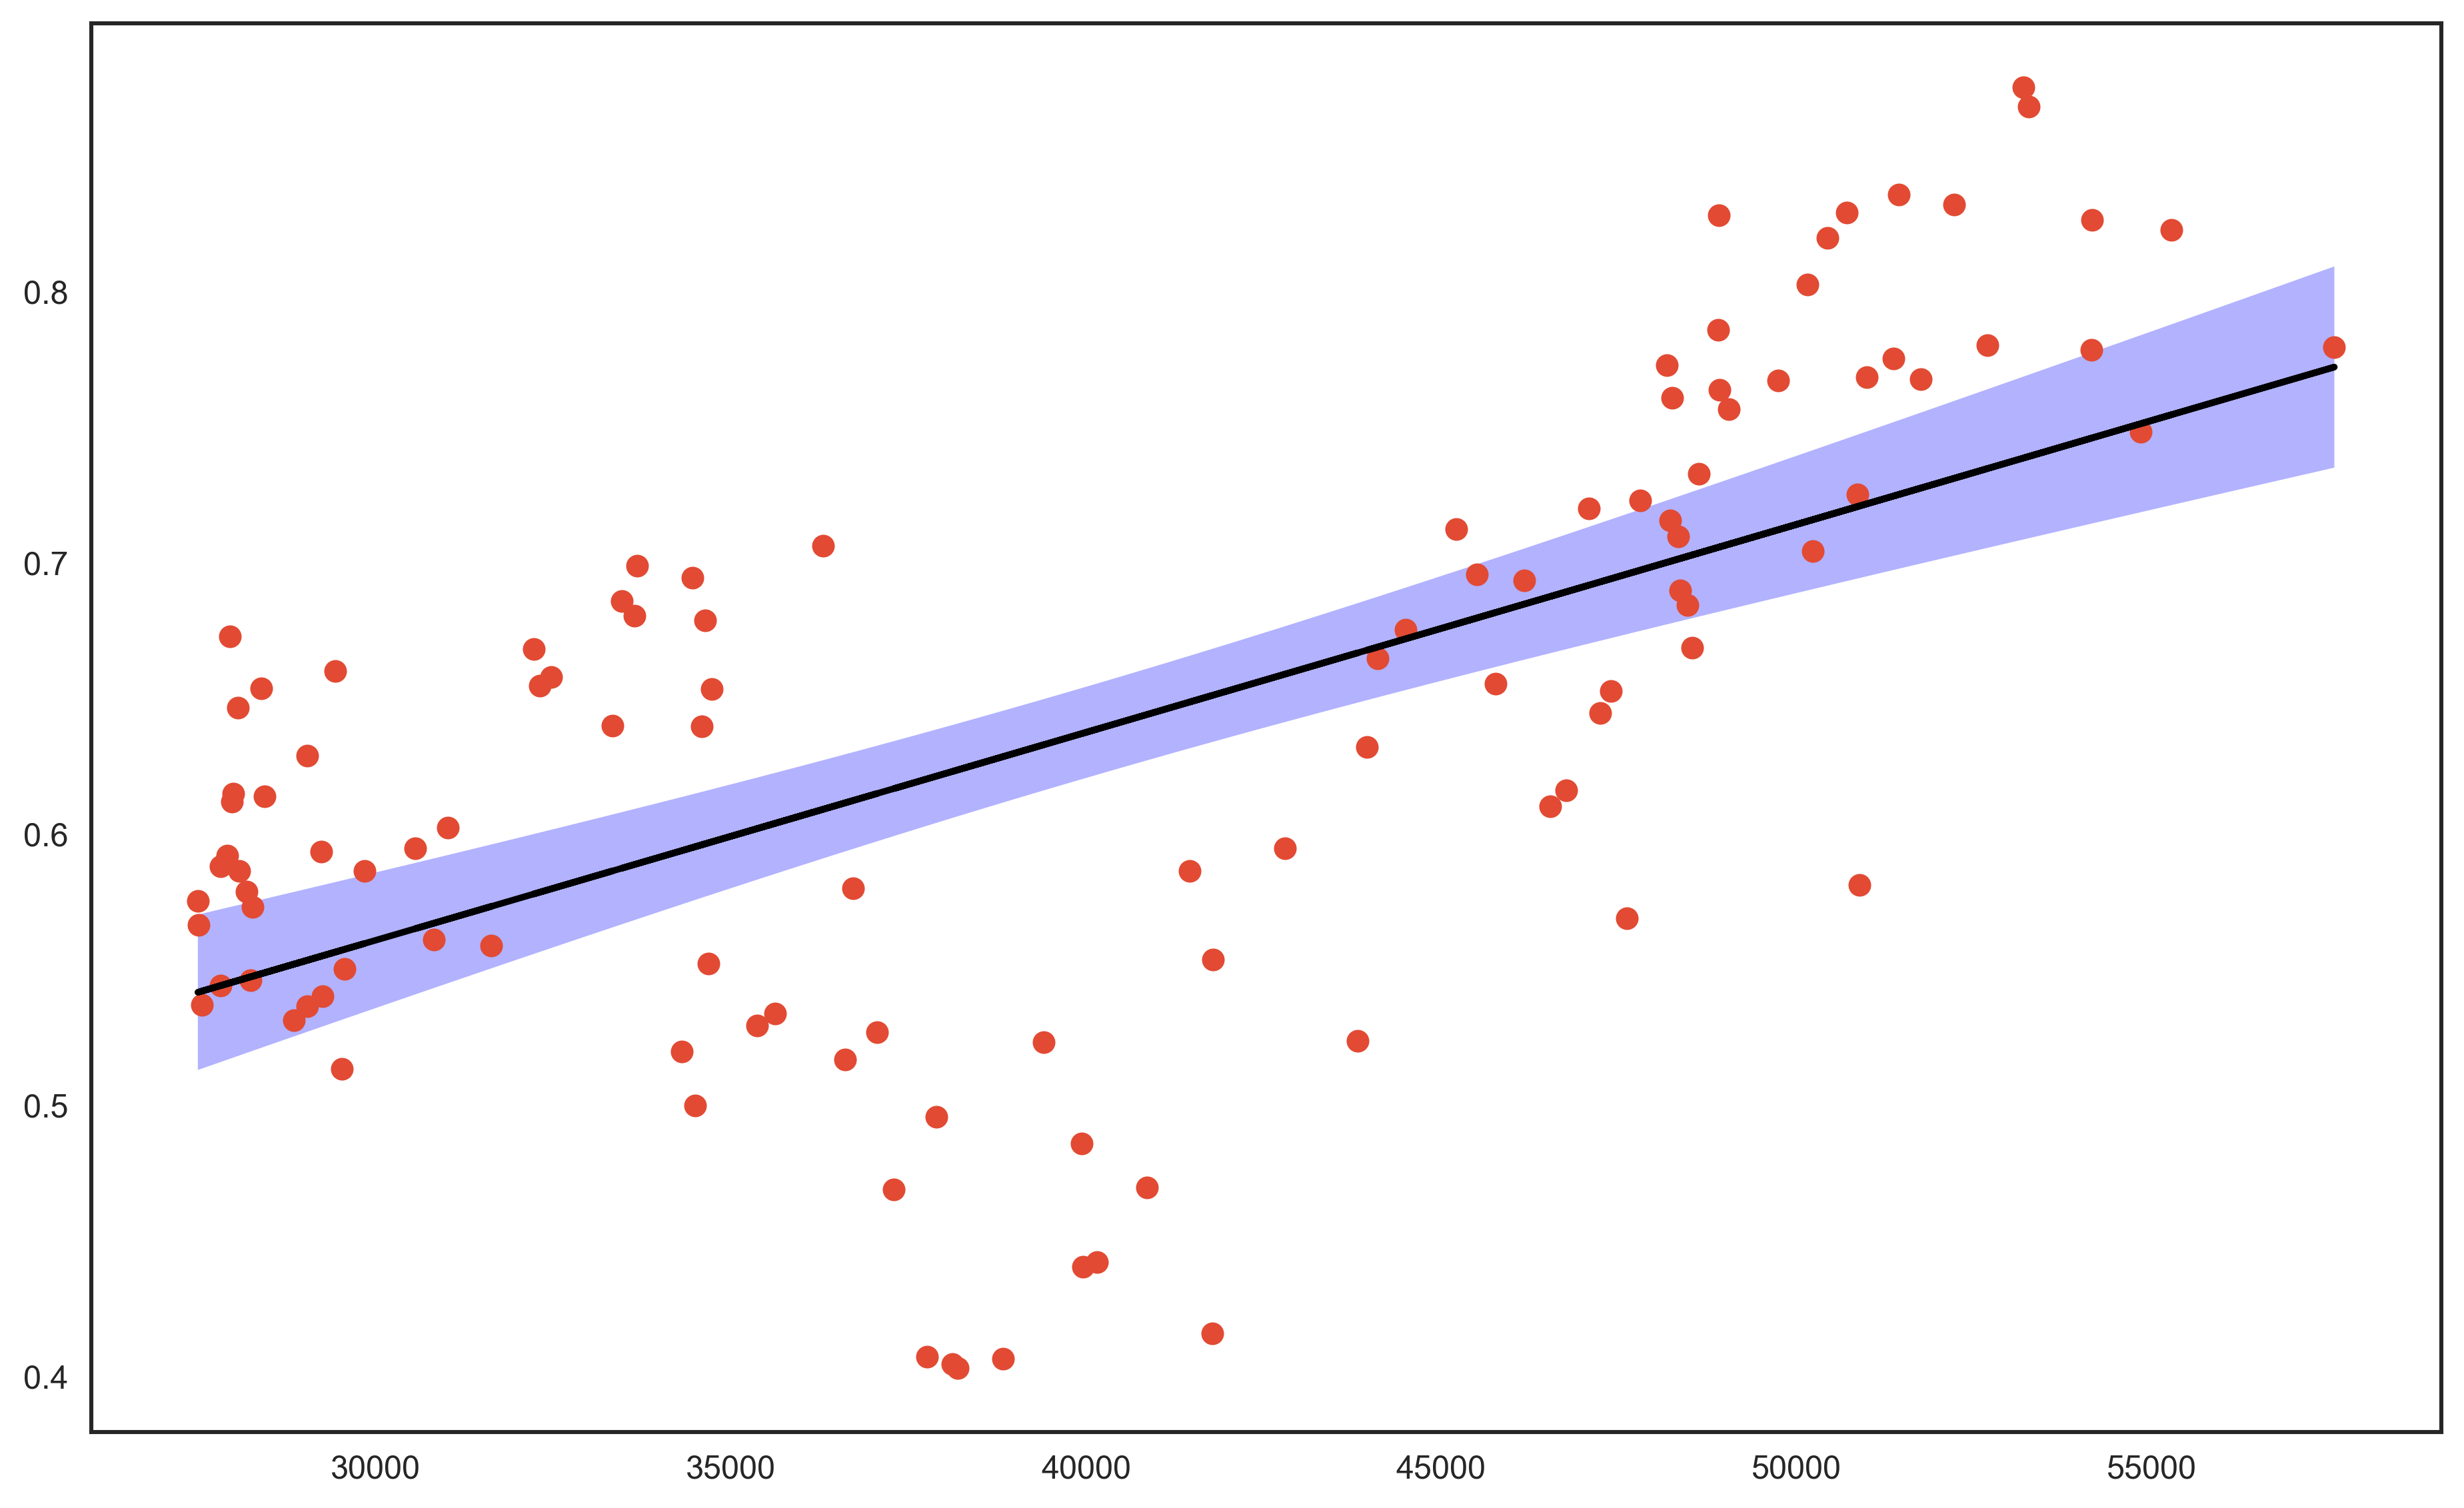

In [0]:
yl,yu,xd = linregress_CIs(economy.GDP.as_matrix(),economy.Foreign_exchange.as_matrix(), .95)
mod = smf.ols(formula='Foreign_exchange ~ 1 + GDP ', data=economy).fit()


plt.plot(economy.GDP,economy.Foreign_exchange, 'o')
plt.plot(economy.GDP, mod.params[1]*economy.GDP+mod.params[0],'k-')
plt.fill_between(xd, yl, yu, alpha=0.3, facecolor='blue',edgecolor='none')
plt.show()
#mod.summary()

### Model 2

With the Linear Regression 2 model we will compare GDP and all other indicator and we will see the indicators how affect GDP

In [0]:
economy.columns

Index([u'GDP', u'Government_expenditure', u'Export_of_goods',
       u'Import_of_goods', u'Interest_rate', u'Government_revenue',
       u'Money_supply', u'Foreign_exchange', u'Consumer_price'],
      dtype='object')

In [0]:
X = economy[['GDP',u'Government_expenditure', u'Export_of_goods',
       u'Import_of_goods', u'Interest_rate', u'Government_revenue',
       u'Money_supply', u'Foreign_exchange', u'Consumer_price']]

In [0]:
y = economy['Foreign_exchange']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, random_state=42)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
regressor = LinearRegression()

In [0]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
print(regressor.intercept_)

3.33066907388e-16


Intercept point on y axis

In [0]:
regressor.coef_

array([  2.36597539e-20,  -7.37404177e-19,   3.39733731e-20,
        -1.20479401e-19,   1.17999696e-17,   5.99765087e-17,
        -1.23781874e-20,   1.00000000e+00,   1.50450245e-17])

Coefficient for each features

In [0]:
X_train.columns

Index([u'GDP', u'Government_expenditure', u'Export_of_goods',
       u'Import_of_goods', u'Interest_rate', u'Government_revenue',
       u'Money_supply', u'Foreign_exchange', u'Consumer_price'],
      dtype='object')

In [0]:
cdf = pd.DataFrame(regressor.coef_,X.columns, columns=['Coeff'])
cdf

Coeff
GDP                     2.365975e-20
Government_expenditure -7.374042e-19
Export_of_goods         3.397337e-20
Import_of_goods        -1.204794e-19
Interest_rate           1.179997e-17
Government_revenue      5.997651e-17
Money_supply           -1.237819e-20
Foreign_exchange        1.000000e+00
Consumer_price          1.504502e-17

One unit increase each column affect each coefficient number on GDP  

In [0]:
prediction = regressor.predict(X_train)

In [0]:
mod.predict(pd.Series(data={'GDP':[50231]}))

array([ 0.71606197])

In [0]:
predictnum = []
for num in economy.GDP.values:
    print mod.predict(pd.Series(data={'GDP':num}))
    predictnum.append(mod.predict(pd.Series(data={'GDP':num})))

[ 0.75151077]
[ 0.77236933]
[ 0.7461697]
[ 0.73882859]
[ 0.73939565]
[ 0.75478285]
[ 0.73134955]
[ 0.72482072]
[ 0.7254031]
[ 0.74621568]
[ 0.71977084]
[ 0.71548725]
[ 0.7176482]
[ 0.73492815]
[ 0.71233011]
[ 0.70594687]
[ 0.70600818]
[ 0.72190114]
[ 0.70380891]
[ 0.70180122]
[ 0.70157899]
[ 0.72088196]
[ 0.69748698]
[ 0.69317273]
[ 0.69600036]
[ 0.72110419]
[ 0.70311158]
[ 0.70094297]
[ 0.70588557]
[ 0.72774797]
[ 0.70706566]
[ 0.7003146]
[ 0.70067476]
[ 0.71606197]
[ 0.69428386]
[ 0.68776269]
[ 0.68946387]
[ 0.70259816]
[ 0.68498104]
[ 0.67983154]
[ 0.67763993]
[ 0.69194666]
[ 0.67218391]
[ 0.66800761]
[ 0.66911107]
[ 0.68183923]
[ 0.6591569]
[ 0.64884257]
[ 0.65138667]
[ 0.6669961]
[ 0.64425246]
[ 0.63717956]
[ 0.63733282]
[ 0.65128705]
[ 0.62870433]
[ 0.62322533]
[ 0.62380771]
[ 0.63887307]
[ 0.62053563]
[ 0.61694171]
[ 0.62153948]
[ 0.63309521]
[ 0.61167726]
[ 0.60219819]
[ 0.60408328]
[ 0.61514091]
[ 0.59550077]
[ 0.59402182]
[ 0.59691075]
[ 0.6124972]
[ 0.59622875]
[ 0.5965506]


In [0]:
checkpred = economy.Foreign_exchange.values

In [0]:
checkpred = pd.DataFrame(checkpred)

In [0]:
checkpred['linear'] =predictnum[0:]

In [0]:
checkpred.head(10)

0            linear
0  0.7485  [0.751510774978]
1  0.7796  [0.772369325475]
2  0.7788  [0.746169698675]
3  0.8755  [0.738828592365]
4  0.8684  [0.739395650681]
5  0.8229  [0.754782854721]
6  0.8323   [0.73134955295]
7  0.7755  [0.724820719364]
8  0.8360   [0.72540310358]
9  0.8267  [0.746215676376]

In check pred table '0' is out Foreign_exchange values linear is predicted values of linear regression now we can compare for the find best model. In the table, some values are so close some is not so it looks like polynomial data we can check with another method.

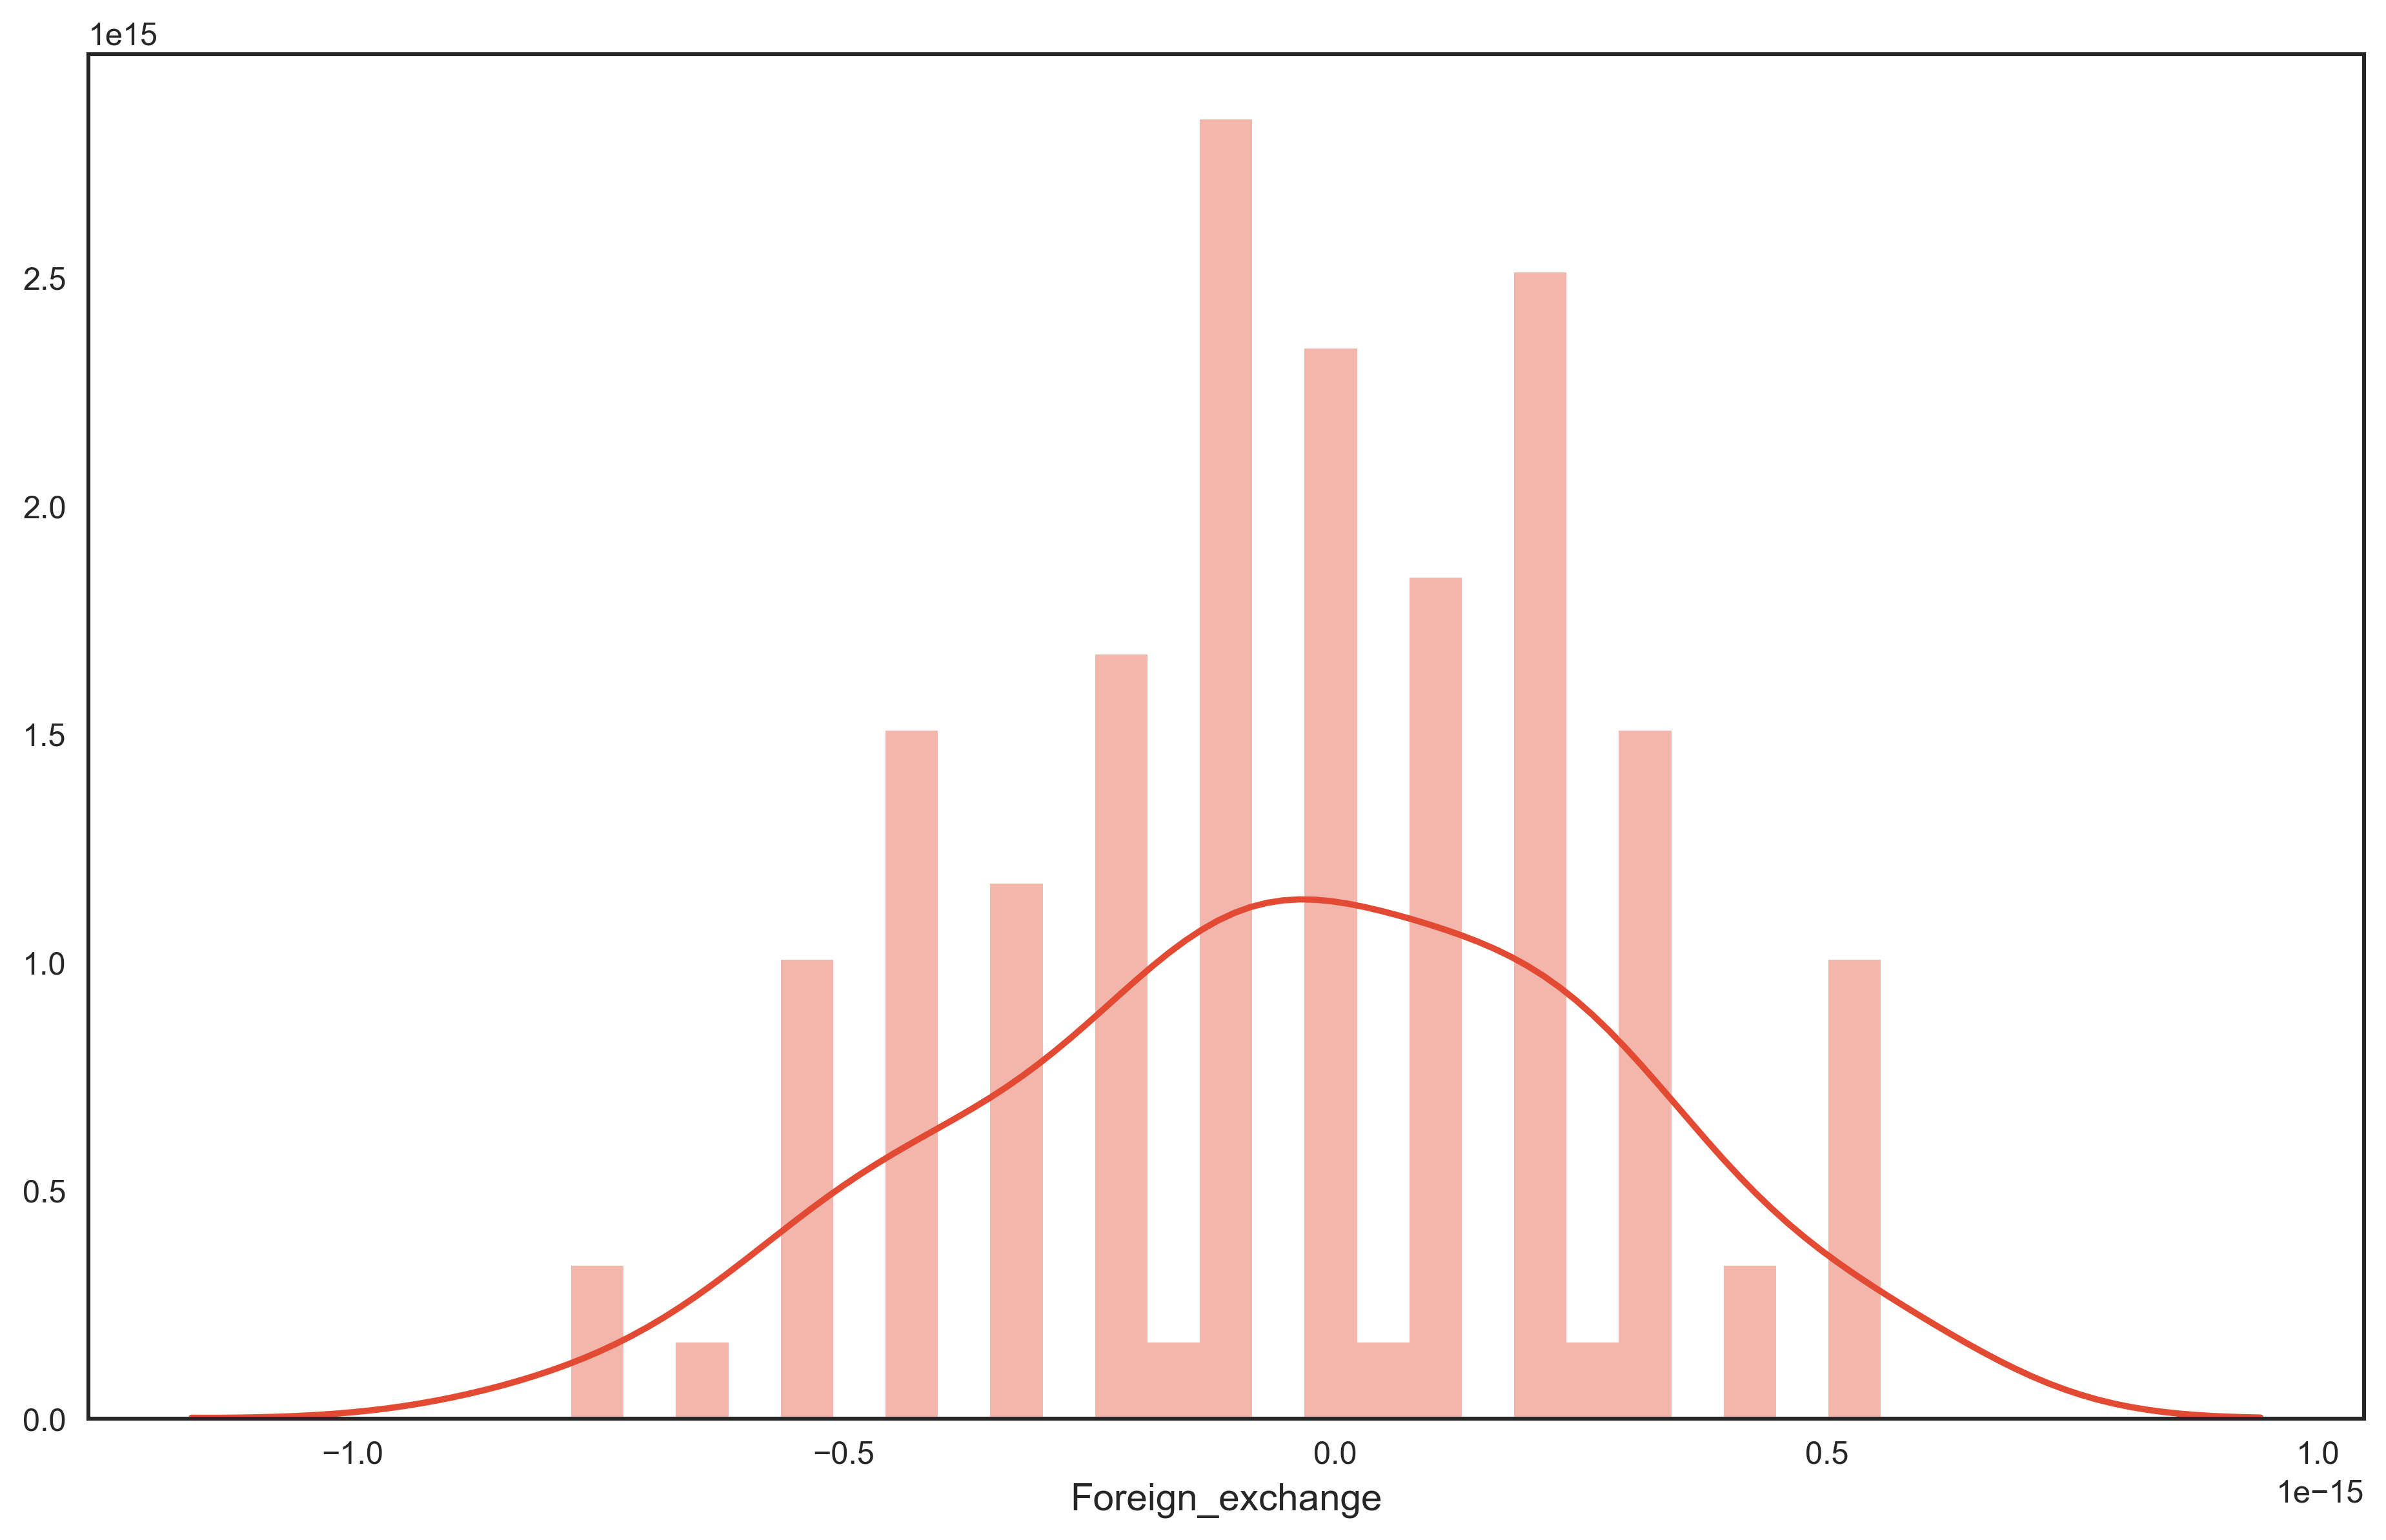

In [0]:
sns.distplot(y_train-prediction, bins=25)

Our residual looked to be normally distributed. That is a very good sign, If you have a normally distributed residuals it means your model was a correct choice. Looks like the model not a perfect choice.

## Multiple Regression Model

In [0]:
multi_linear = smf.ols(formula='GDP ~ Foreign_exchange + Export_of_goods + Money_supply + Consumer_price', data=economy).fit()
print multi_linear.params[0:4]
print 'R-Squared: ', multi_linear.rsquared
multi_linear.summary()

Intercept           15459.886941
Foreign_exchange     1542.865536
Export_of_goods         1.070094
Money_supply            0.444839
dtype: float64
R-Squared:  0.967564377349


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     798.0
Date:                Thu, 27 Jul 2017   Prob (F-statistic):           1.15e-78
Time:                        00:15:58   Log-Likelihood:                -986.51
No. Observations:                 112   AIC:                             1983.
Df Residuals:                     107   BIC:                             1997.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         1.546e+04   2808.514      5.505      0.000      9892.335   2.1e+04
Foreign_exchange  1542.8655   1970.026      0.783      0.435     -2362.481  5448.212
Export_of_goods      1.0701      0.170      6.284      0.000         0.733     1.408
Money_supply         0.4448      0.077      5.761      0.000         0.292     0.598
Consumer_price      42.4643     51.996      0.817      0.416       -60.611   145.540
==============================================================================
Omnibus:                        0.324   Durbin-Watson:                   1.139
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.245
Skew:                           0.113   Prob(JB):                        0.885
Kurtosis:                       2.970   Cond. No.                     4.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 Multiple regression model is looks predictable

## Polynomial Regression Model

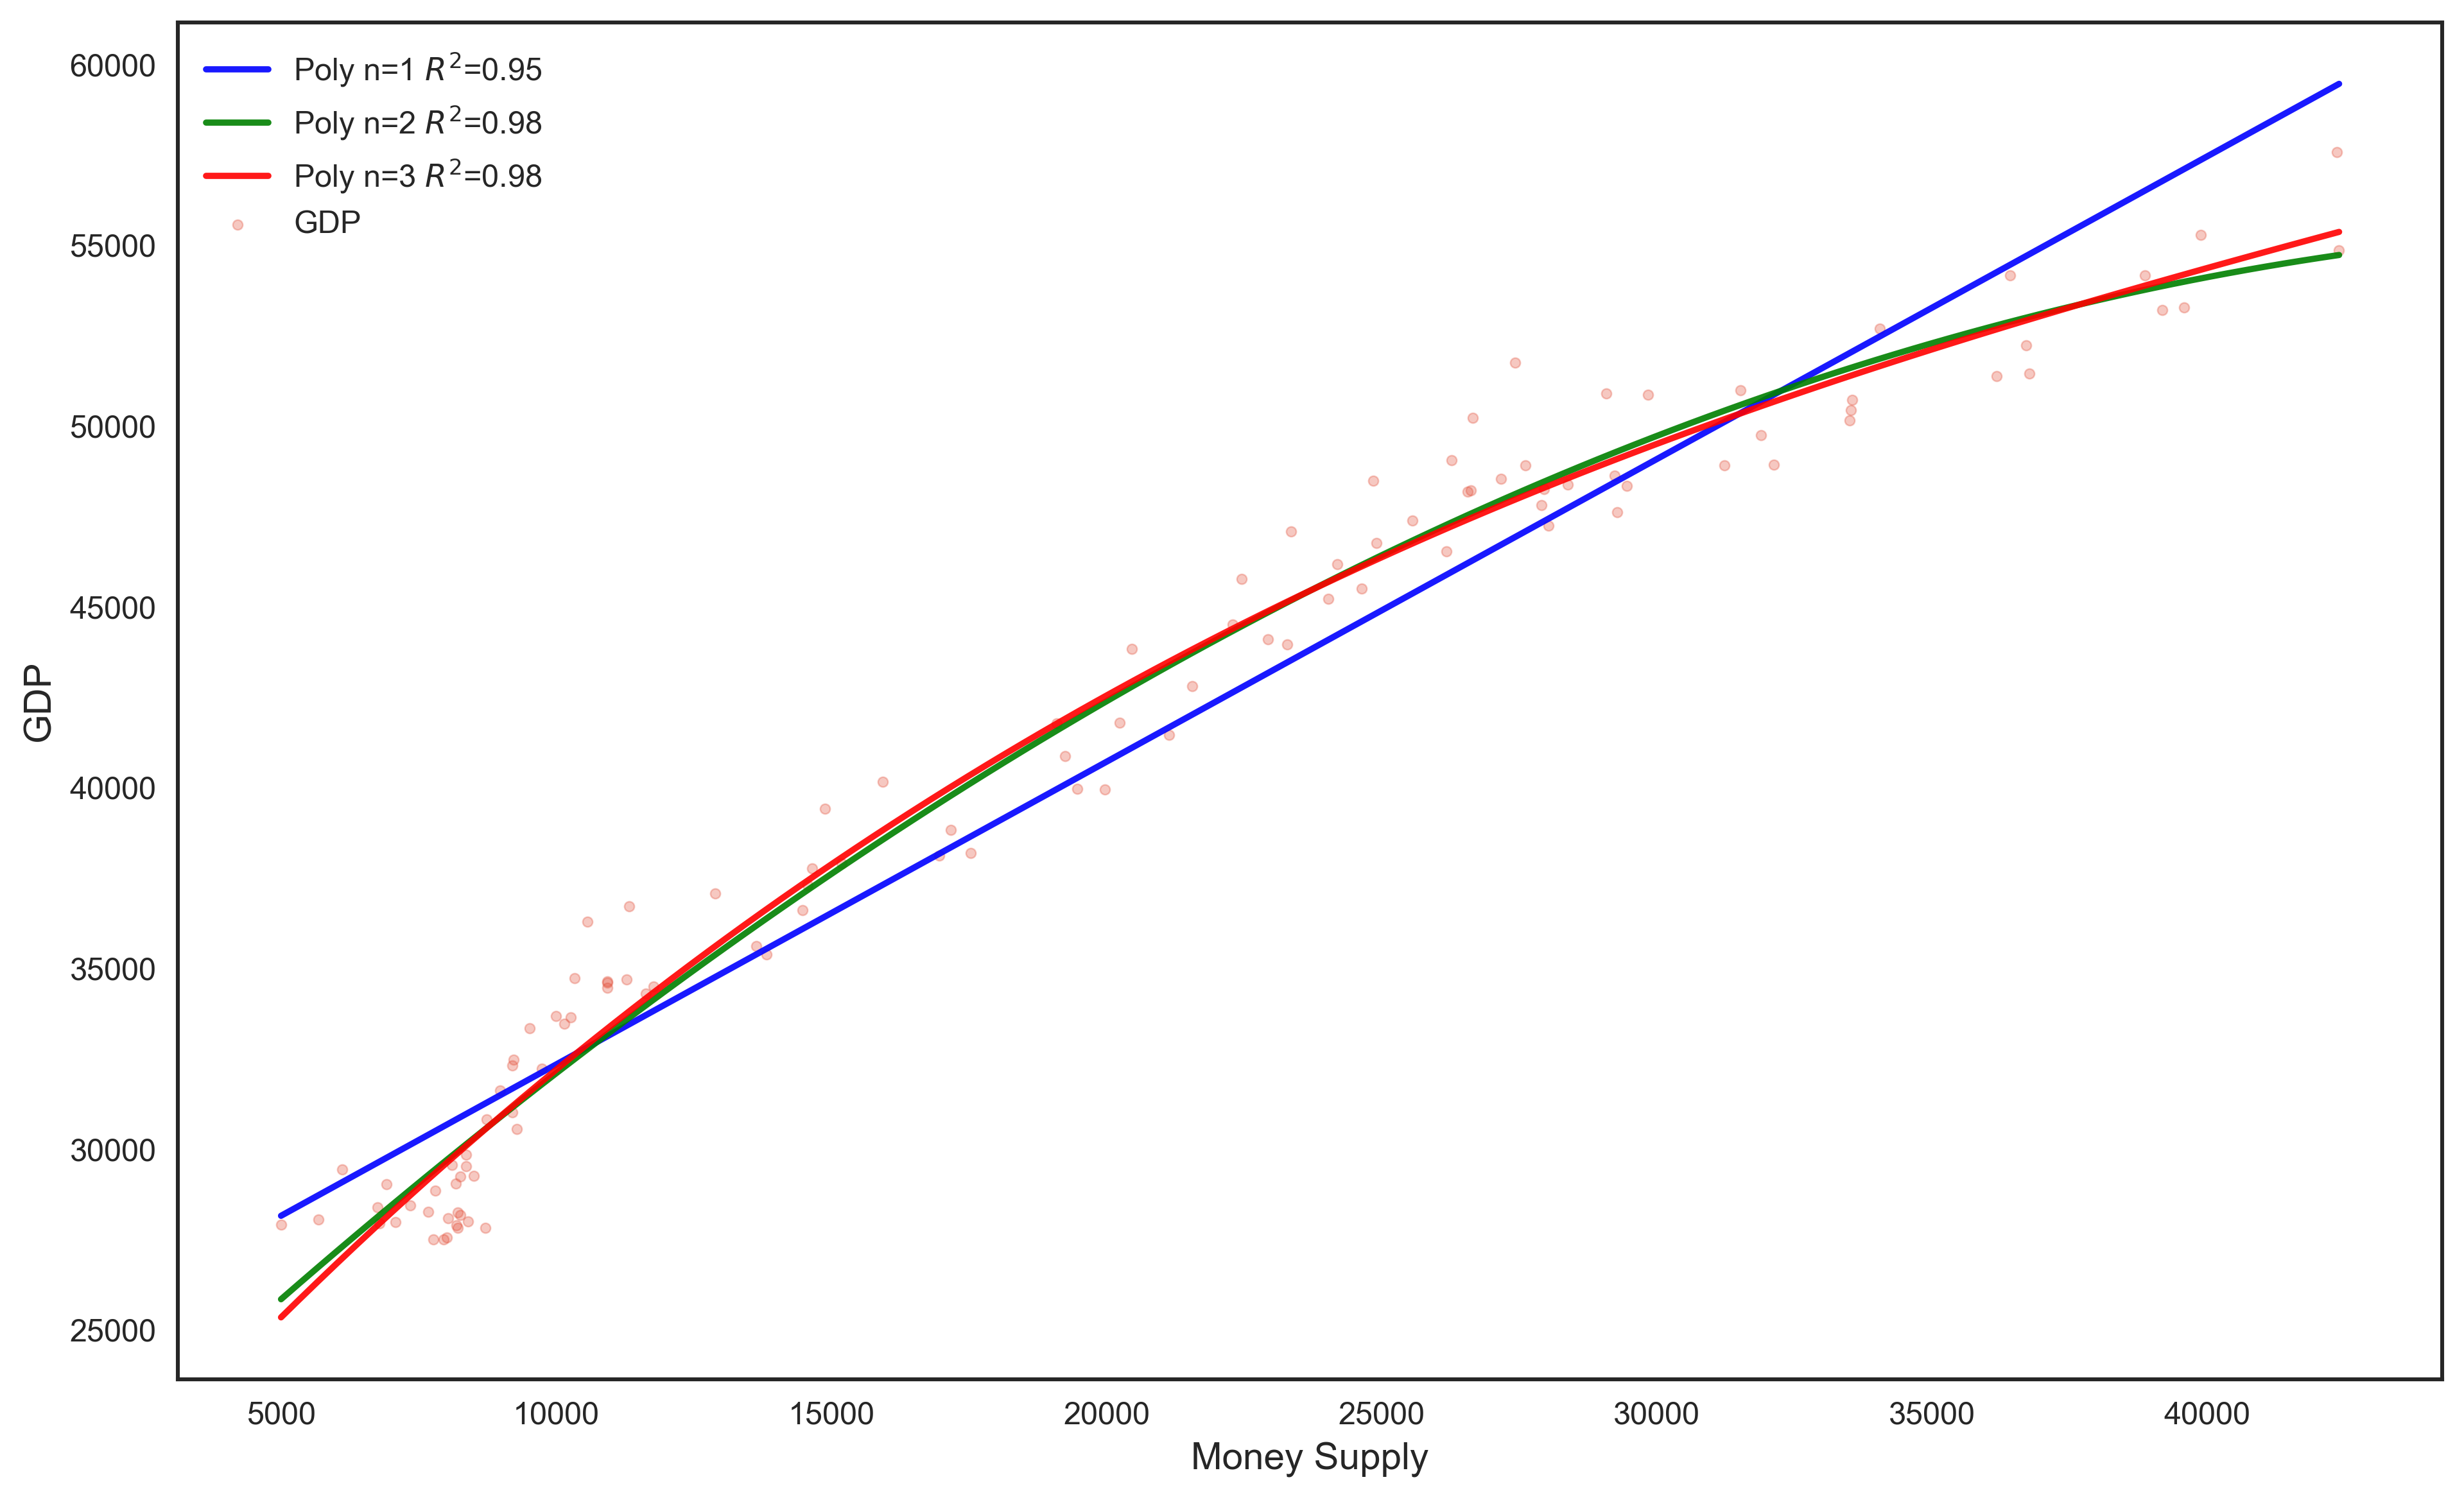

In [0]:
plt.scatter(economy.Money_supply, economy.GDP, s=10, alpha=0.3)
plt.xlabel('Money Supply')
plt.ylabel('GDP')

# points linearlyd space on lstats
x = pd.DataFrame({'Money_supply': np.linspace(economy.Money_supply.min(), economy.Money_supply.max(), len(economy.Money_supply)) })

# 1-st order polynomial
poly_1 = smf.ols(formula='GDP ~ 1 + Money_supply', data=economy).fit()
plt.plot(x, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared,  alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='GDP ~ 1 + Money_supply + I(Money_supply ** 2.0)', data=economy).fit()
plt.plot(x, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='GDP ~ 1 + Money_supply + I(Money_supply ** 2.0) + I(Money_supply ** 3.0)', data=economy).fit()
plt.plot(x, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()
#poly_1.mse_resid

In [0]:
poly_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1473.
Date:                Thu, 27 Jul 2017   Prob (F-statistic):           2.05e-87
Time:                        00:16:03   Log-Likelihood:                -969.32
No. Observations:                 112   AIC:                             1947.
Df Residuals:                     108   BIC:                             1958.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept               1.716e+04   1330.254     12.902      0.000      1.45e+04  1.98e+04
Money_supply               1.7807      0.229      7.789      0.000         1.328     2.234
I(Money_supply ** 2.0)  -2.99e-05   1.09e-05     -2.751      0.007     -5.14e-05 -8.36e-06
I(Money_supply ** 3.0)  2.159e-10   1.54e-10      1.406      0.163     -8.85e-11   5.2e-10
==============================================================================
Omnibus:                        3.258   Durbin-Watson:                   1.025
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                3.095
Skew:                           0.342   Prob(JB):                        0.213
Kurtosis:                       2.559   Cond. No.                     2.24e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
As we can see result of 3. ploynomial model perfectly fited

SyntaxError: invalid syntax (<ipython-input-86-0654d180f3aa>, line 1)

In [0]:
plt.scatter(economy.Export_of_goods, economy.GDP, s=10, alpha=0.3)
plt.xlabel('Export_of_goods')
plt.ylabel('GDP')

# points linearlyd space on lstats
x = pd.DataFrame({'Export_of_goods': np.linspace(economy.Export_of_goods.min(), economy.Export_of_goods.max(), len(economy.Export_of_goods)) })

# 1-st order polynomial
poly_1 = smf.ols(formula='GDP ~ 1 + Export_of_goods', data=economy).fit()
plt.plot(x, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared,  alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='GDP ~ 1 + Export_of_goods + I(Export_of_goods ** 2.0)', data=economy).fit()
plt.plot(x, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='GDP ~ 1 + Export_of_goods + I(Export_of_goods ** 2.0) + I(Export_of_goods ** 3.0)', data=economy).fit()
plt.plot(x, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()
#poly_1.mse_resid

## OLS Regression Model

In [0]:
#generate the model
mod = smf.ols(formula='GDP ~ 1 + Foreign_exchange', data=economy).fit()

#extract the parameters for the confidence window
x_pred = np.linspace(economy.Foreign_exchange.min(), economy.Foreign_exchange.max(), len(economy.Foreign_exchange))
x_pred2 = sm.add_constant(x_pred)

#confidence = 50% (alpha=0.5)
sdev, lower, upper = wls_prediction_std(mod, exog=x_pred2, alpha=0.5)

#plot points and confidence window
plt.scatter(economy.Foreign_exchange, economy.GDP, s=10, alpha=0.9)
plt.fill_between(x_pred, lower, upper, color='#888888', alpha=0.2)

#plot the regression line
plt.plot(economy.Foreign_exchange, mod.predict(economy[['Foreign_exchange']] ), 'b-', label='Linear n=1 $R^2$=%.2f' % mod.rsquared, alpha=0.9)

plt.xlabel('GDP')
plt.ylabel('Foreign_exchange')
plt.legend(loc='upper left', framealpha=0.5, prop={'size':'small'})
plt.title("GDP - Foreign_exchange")

mod.summary()

As we can see above data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1480.
Date:                Thu, 27 Jul 2017   Prob (F-statistic):           1.26e-65
Time:                        00:16:04   Log-Likelihood:                -1028.9
No. Observations:                 112   AIC:                             2062.
Df Residuals:                     110   BIC:                             2067.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        1.171e+04    766.793     15.266      0.000      1.02e+04  1.32e+04
Export_of_goods     2.6161      0.068     38.465      0.000         2.481     2.751
==============================================================================
Omnibus:                        4.593   Durbin-Watson:                   1.324
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.644
Skew:                           0.486   Prob(JB):                       0.0981
Kurtosis:                       2.779   Cond. No.                     3.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

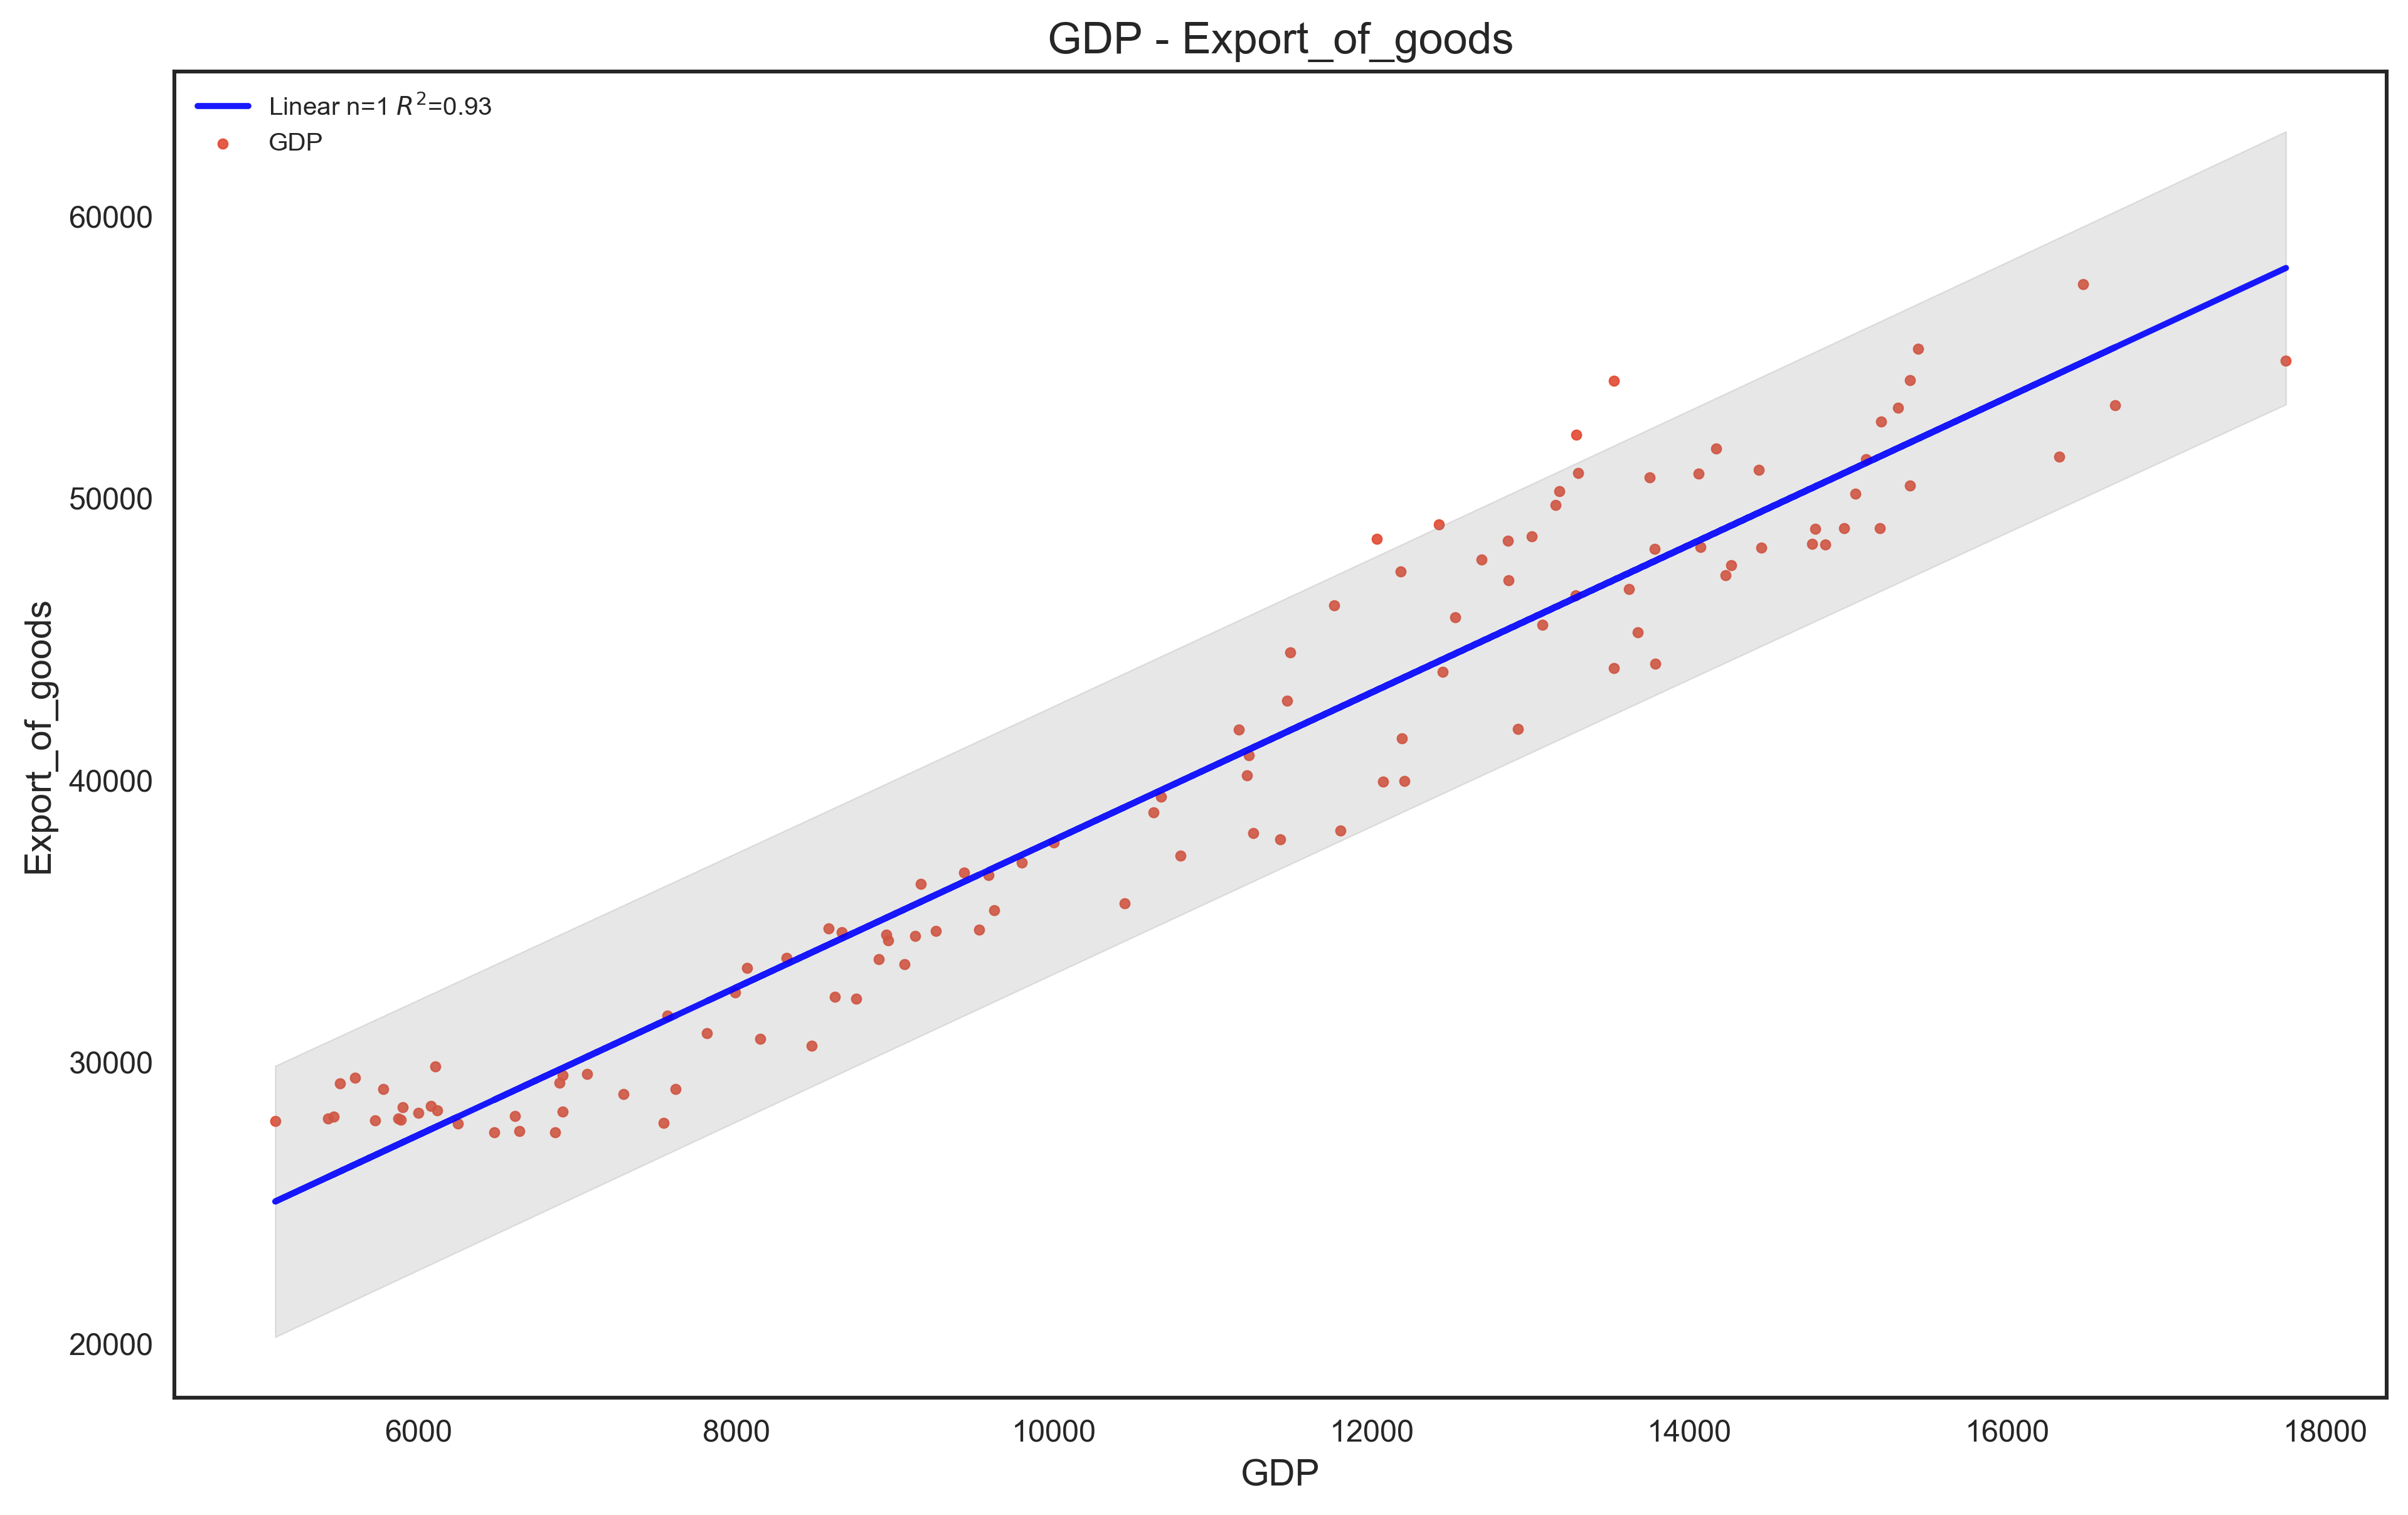

In [0]:
#generate the model
mod = smf.ols(formula='GDP ~ 1 + Export_of_goods', data=economy).fit()

#extract the parameters for the confidence window
x_pred = np.linspace(economy.Export_of_goods.min(), economy.Export_of_goods.max(), len(economy.Export_of_goods))
x_pred2 = sm.add_constant(x_pred)

#confidence = 50% (alpha=0.05)
sdev, lower, upper = wls_prediction_std(mod, exog=x_pred2, alpha=0.05)

#plot points and confidence window
plt.scatter(economy.Export_of_goods, economy.GDP, s=10, alpha=0.9)
plt.fill_between(x_pred, lower, upper, color='#888888', alpha=0.2)

#plot the regression line
plt.plot(economy.Export_of_goods, mod.predict(economy[['Export_of_goods']] ), 'b-', label='Linear n=1 $R^2$=%.2f' % mod.rsquared, alpha=0.9)

plt.xlabel('GDP')
plt.ylabel('Export_of_goods')
plt.legend(loc='upper left', framealpha=0.5, prop={'size':'small'})
plt.title("GDP - Export_of_goods")

mod.summary()

## K-Nearest Neighbors Model

In [0]:
X = economy.GDP.values
X = np.reshape(X, (len(economy.Foreign_exchange), 1.0))
y = economy.Foreign_exchange.values
y = np.reshape(y, (len(economy.GDP), 1.0))

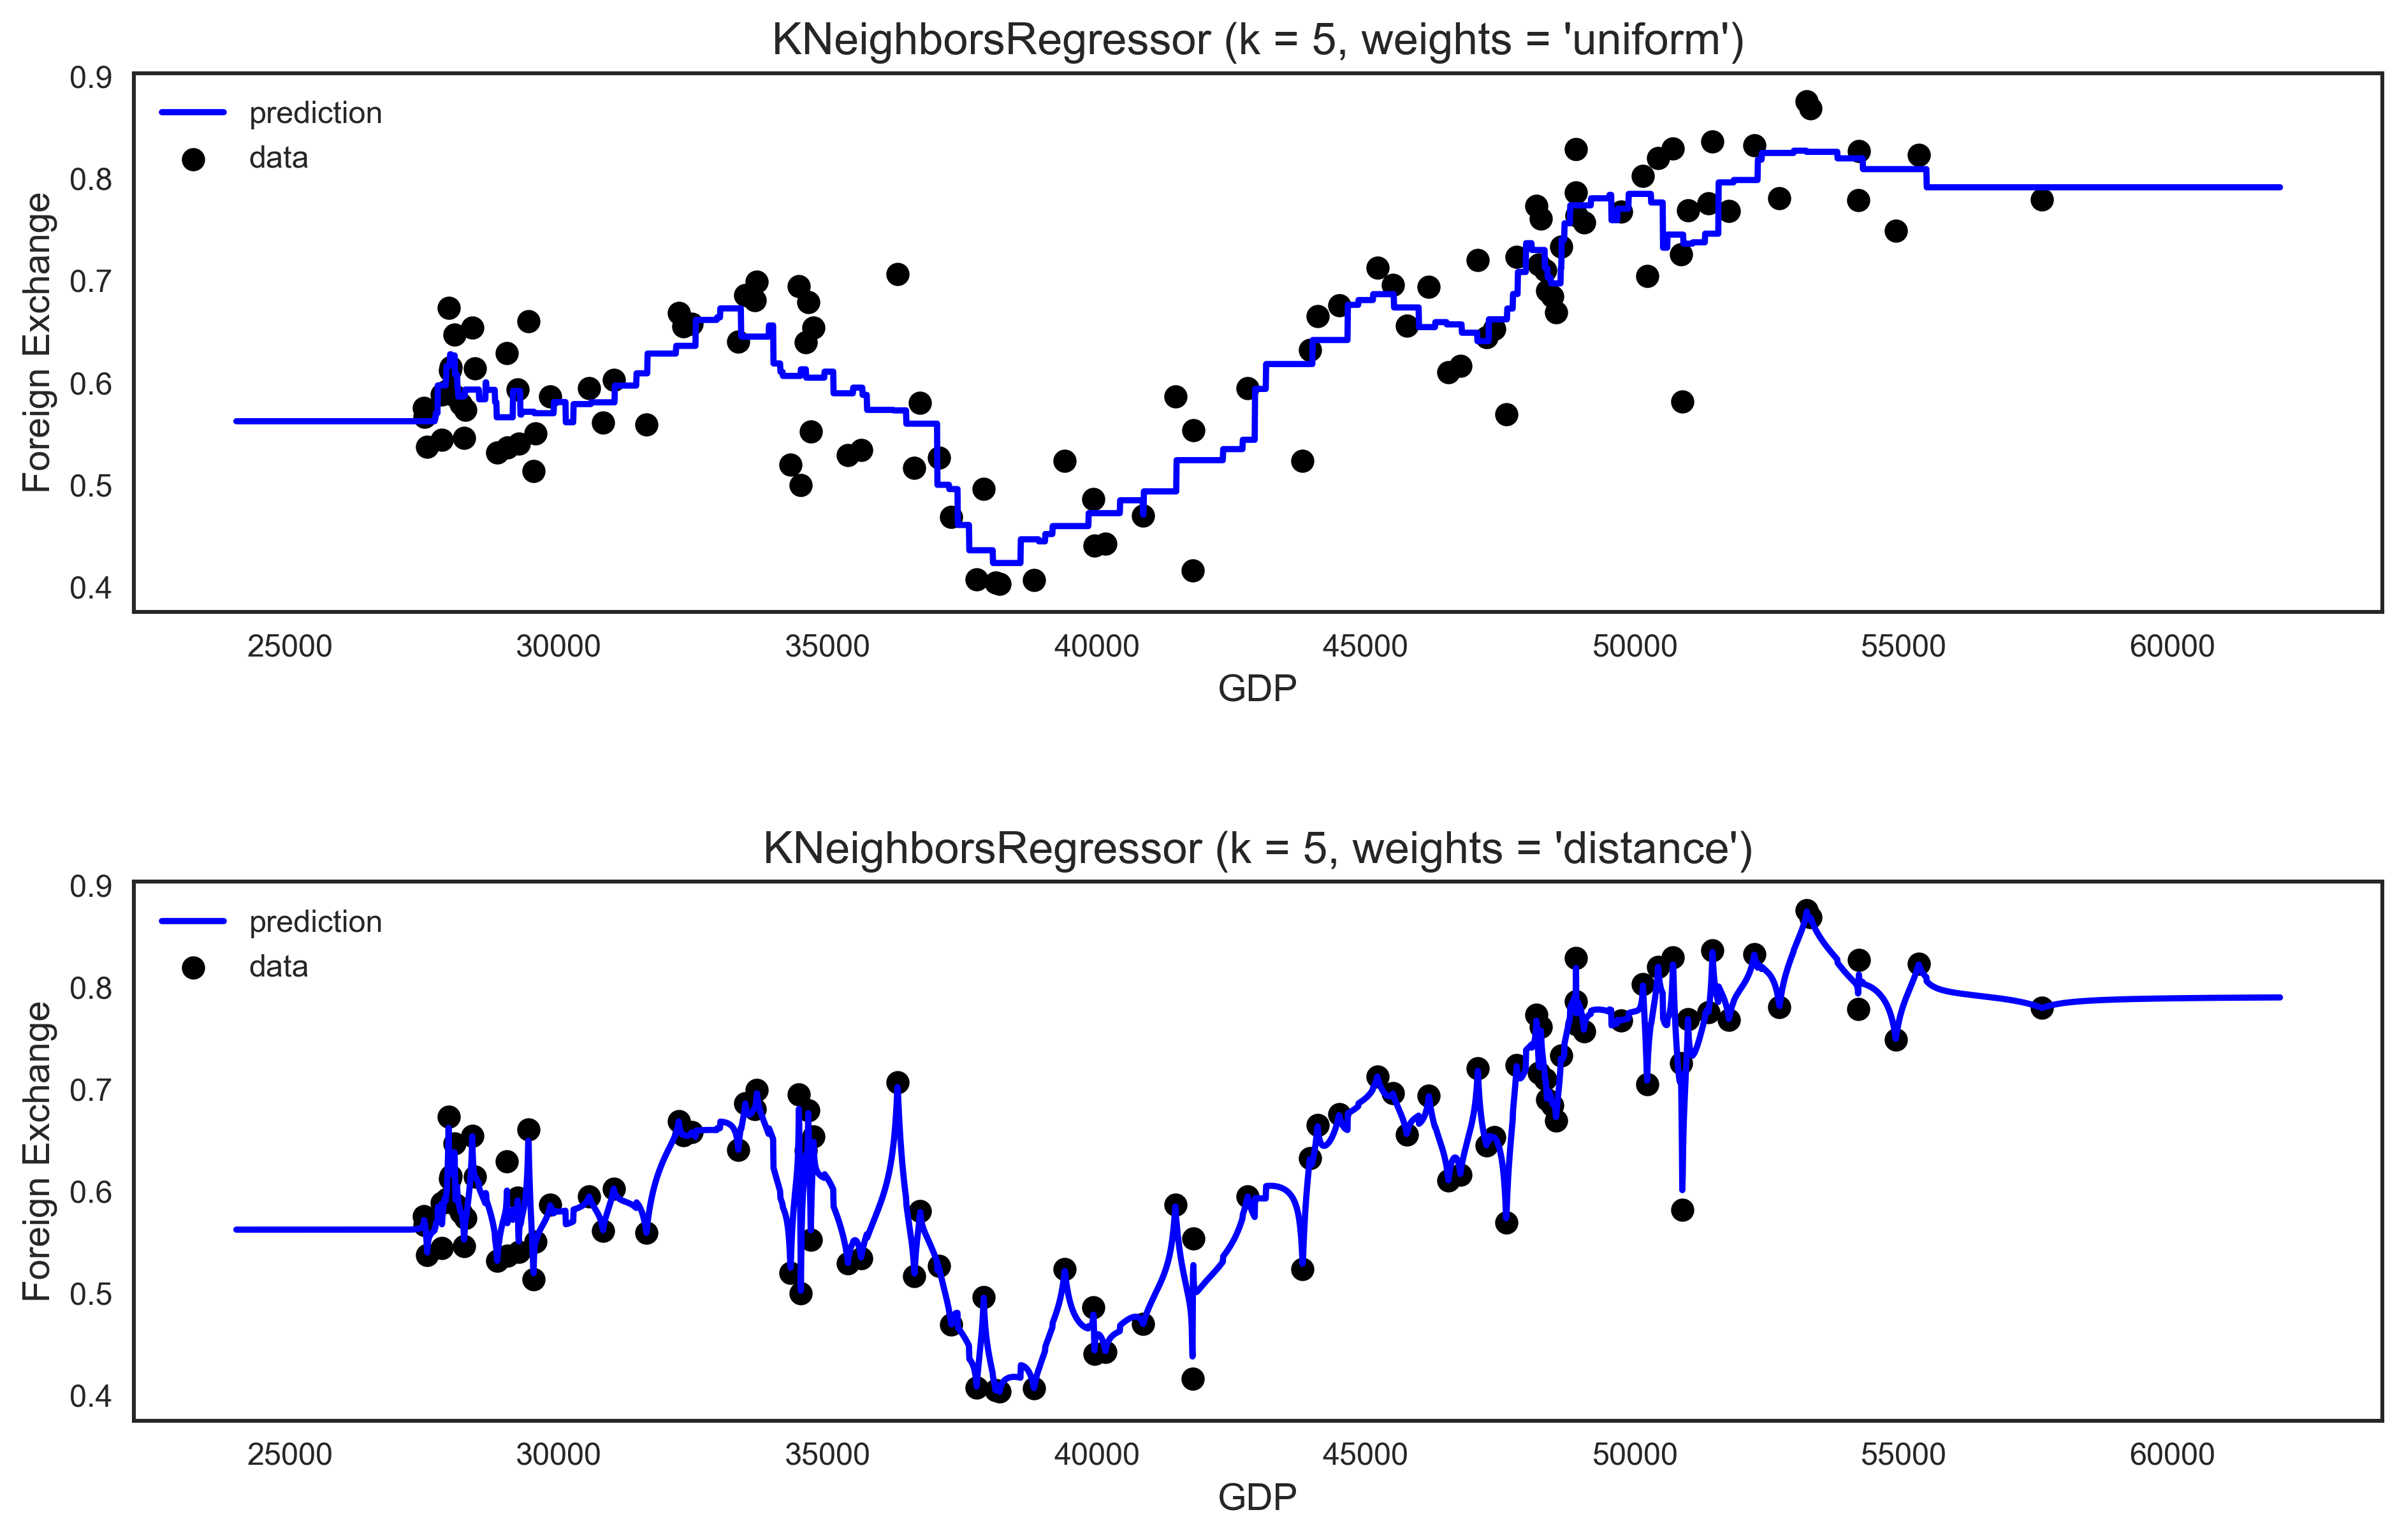

In [0]:


# Fit regression model
x = np.linspace(24000, 62000,5000)[:, np.newaxis]
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_hat = knn.fit(X, y).predict(x)
    
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(x, y_hat, c='b', label='prediction')
    plt.axis('tight')
    plt.xlabel('GDP')
    #plt.ylabel('Total')
    plt.ylabel('Foreign Exchange')
    plt.legend(loc='upper left')
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.subplots_adjust( hspace=0.5)
    
plt.show()

In [0]:
knn = neighbors.KNeighborsRegressor(n_neighbors=15, weights='uniform')
mod = knn.fit(X, y)

In [0]:
x = np.reshape(economy['GDP'].values, (len(economy['GDP']), 1)) + 0.001

In [0]:
y_hat = mod.predict(x)

In [0]:
def calculate_regression_goodness_of_fit(ys, y_hat):
    ss_total = 0
    ss_residual = 0
    ss_regression = 0
    y_mean = y.mean()
    
    for i in range(len(ys)):
        ss_total += np.square(ys[i] - y_mean)
        ss_residual += np.square(ys[i] - y_hat[i])
        ss_regression += np.square(y_hat[i] - y_mean)
    
    r_square = ss_regression / ss_total
    rmse = np.sqrt( ss_residual / float(len(ys)) )
    
    return r_square[0], rmse[0]

In [0]:
calculate_regression_goodness_of_fit(y, y_hat)

(0.65901579723817394, 0.05456150564286024)

In [0]:
rsquare_arr = []
rmse_arr = []

for k in range(2, len(y)):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    y_hat = knn.fit(X, y).predict(x)
    rsquare, rmse = calculate_regression_goodness_of_fit(y, y_hat)
    rmse_arr.append(rmse)
    rsquare_arr.append(rsquare)

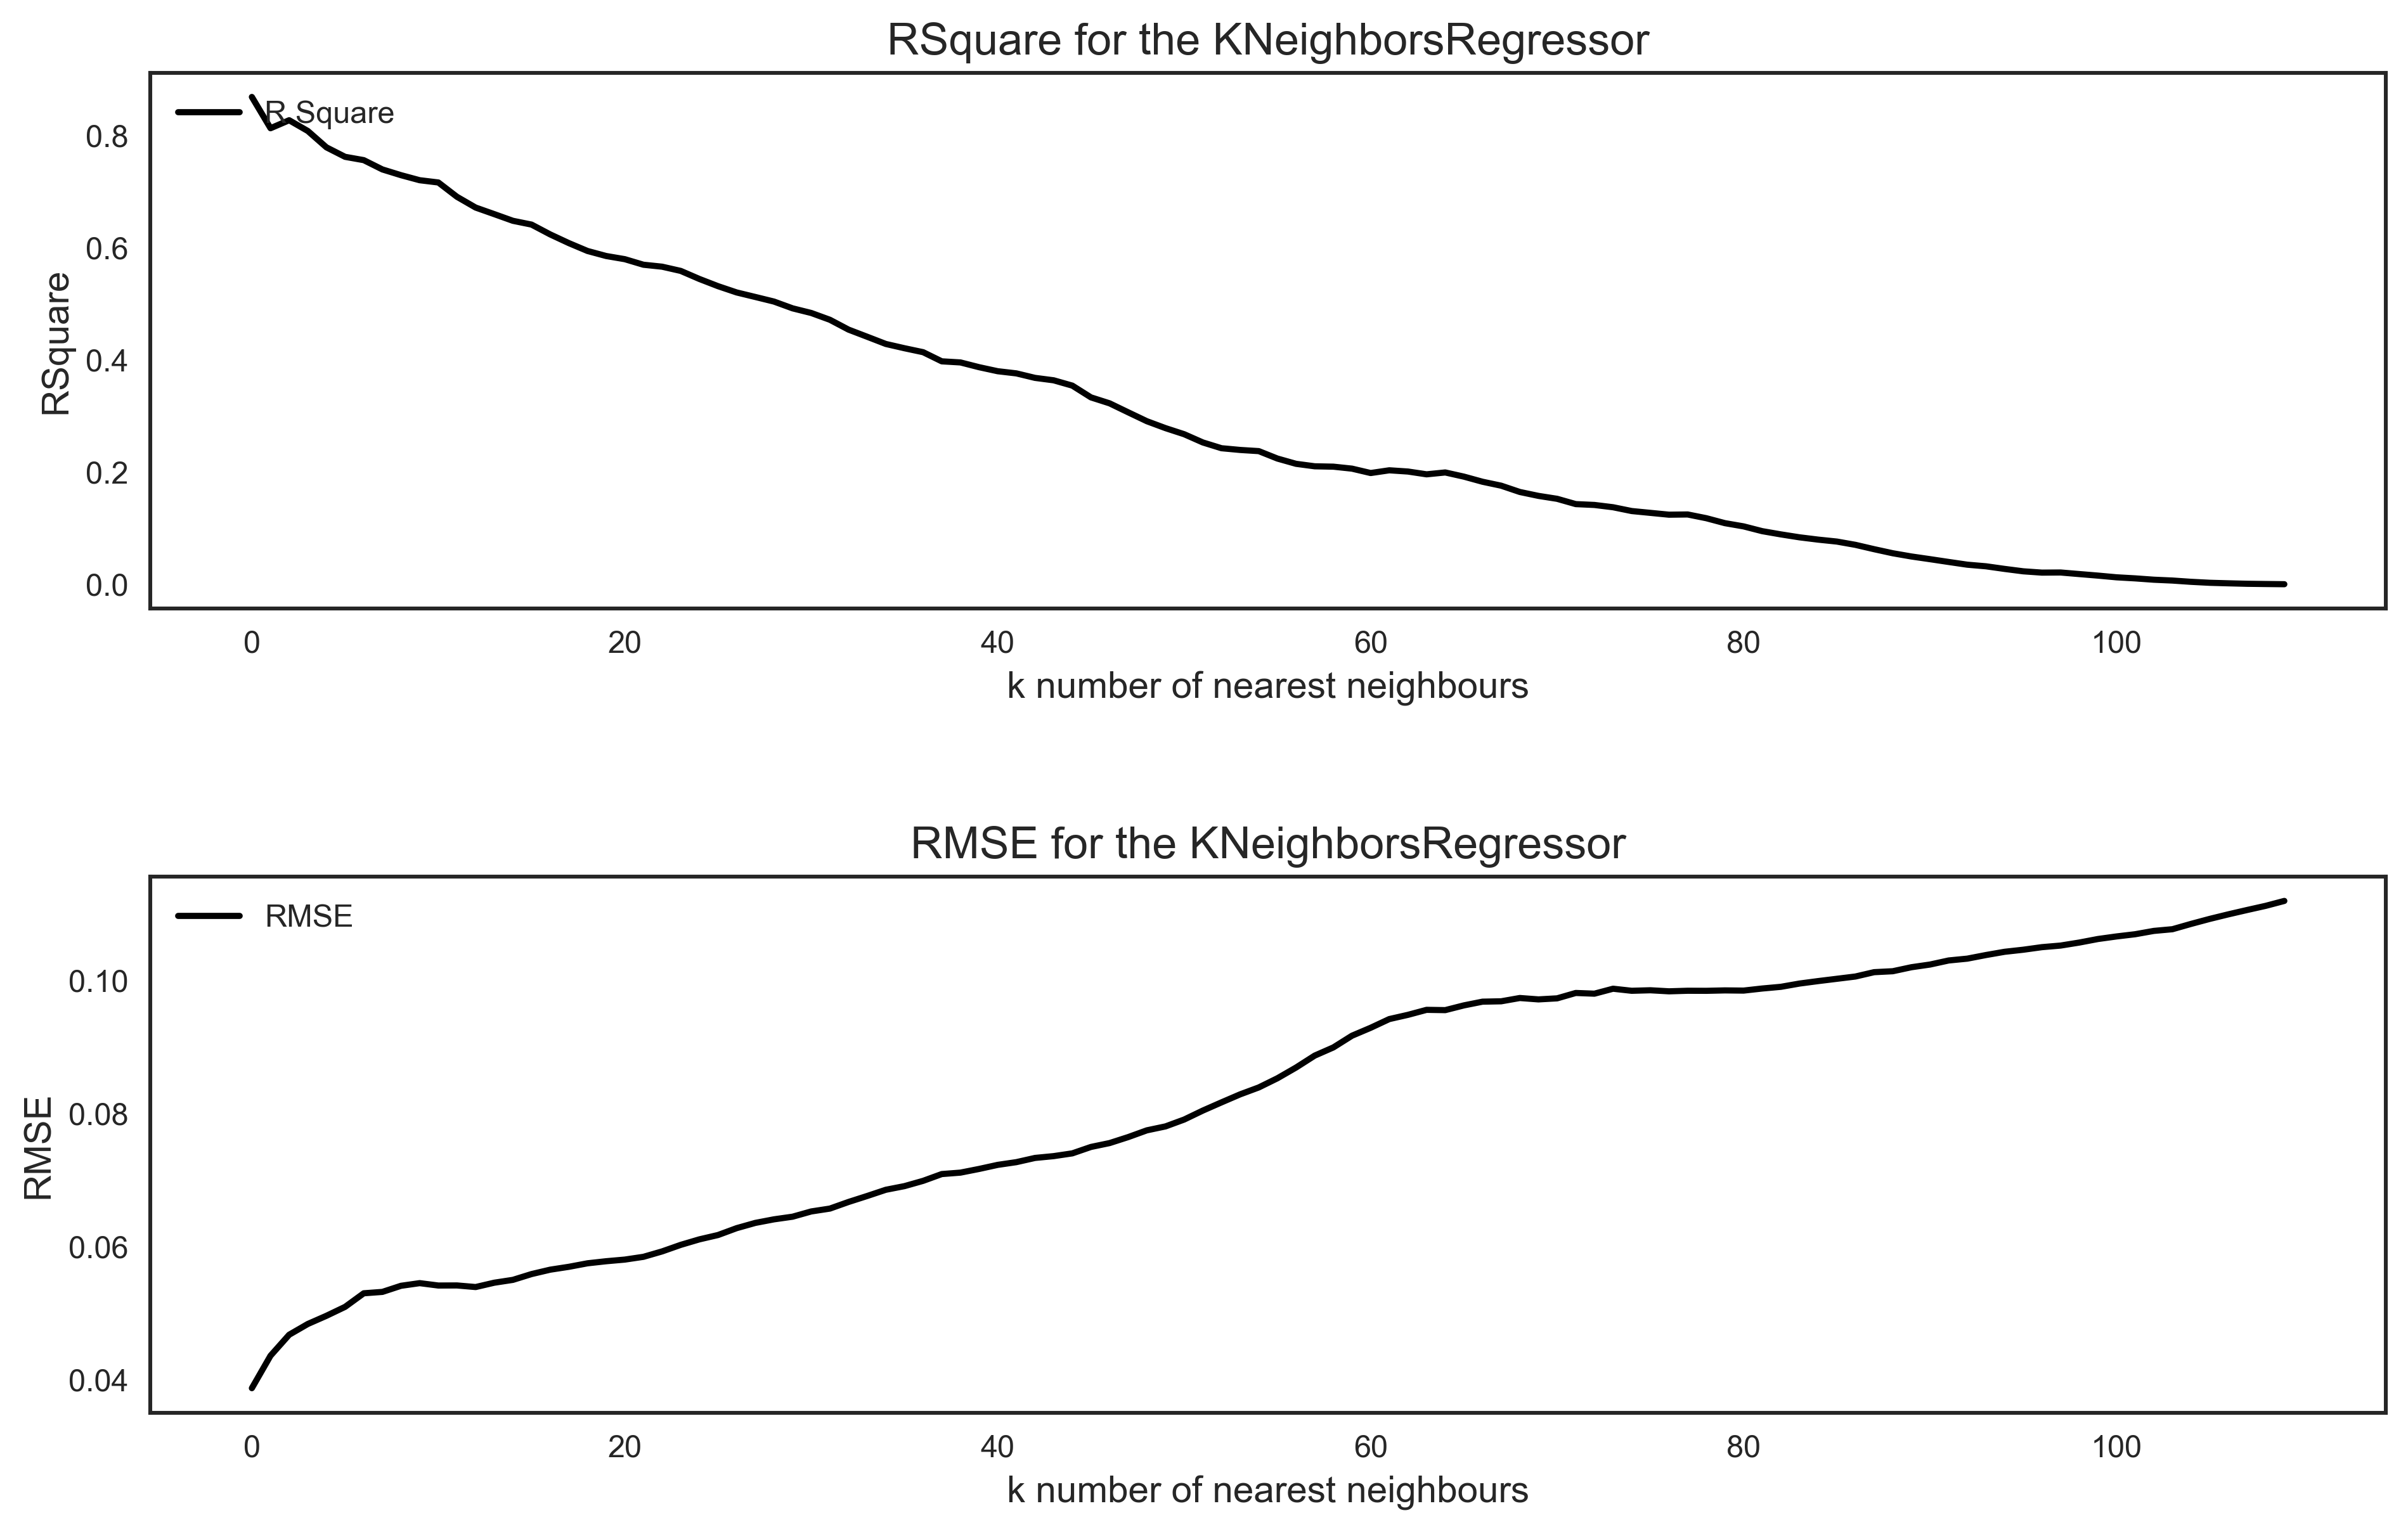

In [0]:
plt.subplot(2, 1, 1)
plt.plot(range(len(rmse_arr)), rsquare_arr, c='k', label='R Square')
plt.axis('tight')
plt.xlabel('k number of nearest neighbours')
plt.ylabel('RSquare')
plt.legend(loc='upper left')
plt.title("RSquare for the KNeighborsRegressor")
plt.subplots_adjust( hspace=0.5)

plt.subplot(2, 1, 2)
plt.plot(range(len(rmse_arr)), rmse_arr, c='k', label='RMSE')
plt.axis('tight')
plt.xlabel('k number of nearest neighbours')
plt.ylabel('RMSE')
plt.legend(loc='upper left')
plt.title("RMSE for the KNeighborsRegressor")

In [0]:
predictknn = []
for num in economy.GDP.values:
    predictknn.append(mod.predict(pd.Series(data={'GDP':num})))

In [0]:
checkknn = economy.Foreign_exchange.values

In [0]:
checkknn = pd.DataFrame(checkpred)

In [0]:
checkknn['linear'] =predictknn[0:]

In [0]:
checkknn.head(20)

0              linear
0   0.7485  [[0.784546666667]]
1   0.7796  [[0.784546666667]]
2   0.7788  [[0.784546666667]]
3   0.8755         [[0.78786]]
4   0.8684         [[0.78786]]
5   0.8229  [[0.784546666667]]
6   0.8323         [[0.78474]]
7   0.7755  [[0.782386666667]]
8   0.8360  [[0.782386666667]]
9   0.8267  [[0.784546666667]]
10  0.8293          [[0.7707]]
11  0.8027  [[0.765286666667]]
12  0.8200  [[0.767613333333]]
13  0.7805  [[0.787666666667]]
14  0.7675  [[0.748086666667]]
15  0.8284  [[0.744306666667]]
16  0.7639  [[0.744306666667]]
17  0.7687  [[0.767506666667]]
18  0.7329         [[0.72874]]
19  0.6901  [[0.721106666667]]

In checkknn table '0' is out Foreign_exchange values and linear is predicted values of KNN model. As we can see results are much better than linear regression.

### Result

 We tried Predictive model for find best model for our data and relationship between the economic indicators.
Our data tables and graphs show us the data economic indicators are strongly related with the GDP and GDP is affect Foreign exchange rates. New Zealand economy is growing and the indicators of data syrongly affect for the growth. 
 
